In [2]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns

In [3]:
device = 'cpu'
gen_dir = 'generated_data/'
models_dir = 'models/'

In [4]:
def acf_batch(batch, square=False, abs=False):
    series = []
    for i in range(batch.shape[0]):
        s = batch[i, :]
        if square:
            s = np.square(s)
        if abs:
            s = np.abs(s)
        acfs = acf(s)[1:25]
        series.append(pd.Series(acfs) )
    df = pd.concat(series, axis=1).T
    df.columns = list(range(1,25))
    return df 

def plot_cumulativesum(batch, index, title):
    for i in index: 
        plt.plot(np.cumsum(batch[i]))
    plt.title(title)
    plt.show()

In [5]:
# Load data
data = np.load('master_data/data.npy')
train_batches = data.shape[0] # N hereafter. Number of training images in database.
length = data.shape[1] 
stocks = data.shape[2]
print('Number of training batches: ', train_batches)
print('Length of each batch: ', length)
print('Number of stocks: ', stocks)

Number of training batches:  79
Length of each batch:  256
Number of stocks:  434


In [6]:
vaeconv1 = np.load(gen_dir + 'vaeconv1.npy')
print(vaeconv1.shape)
vaeconv3 = np.load(gen_dir + 'vaeconv3.npy')
print(vaeconv3.shape)
vaefd1 = np.load(gen_dir + 'vaefd1.npy')
print(vaefd1.shape)
vaefd2 = np.load(gen_dir + 'vaefd2.npy')
print(vaefd2.shape)
vqvaeconv2 = np.load(gen_dir + 'vqvaeconv2.npy')
print(vqvaeconv2.shape)
vqvaefd1 = np.load(gen_dir + 'vqvaefd1.npy')
print(vqvaefd1.shape)
timevaebase = np.load(gen_dir + 'timevaebase.npy')
print(timevaebase.shape)
timegan = np.load(gen_dir + 'timegan.npy')
print(timegan.shape)

(434, 256)
(434, 256)
(434, 256)
(434, 256)
(434, 256)
(434, 256)
(434, 256)
(434, 256)


In [7]:
generated = {
   'TIME VAE BASE':timevaebase,
   'VAE Convolutional 1 ':vaeconv1,
   'VAE Convolutional 2':vaeconv3,
   'VAE Dense Layers 1':vaefd1,
   'VAE Dense Layers 2':vaefd2,
   'VQ-VAE Convolutional':vqvaeconv2,
   'VQ-VAE Dense Layers':vqvaefd1,

   # 'TIME GAN':timegan
             }

In [8]:
# Radom batches
index = np.random.randint(0, train_batches, 4)
index = [38, 25, 56, 24]

In [9]:
data_eval = np.zeros((len(index), data.shape[2], data.shape[1]))
# print(data_eval.shape)
for i in range(len(index)):
    # print(i)
    batch = data[index[i], :, :].copy()
    batch = np.transpose(batch)
    data_eval[i] = batch
data_eval.shape

(4, 434, 256)

# Central Moments 

In [10]:
moments_data = {}
for i in range(data_eval.shape[0]):
    # print(i)
    # break
    moments_data['Mean_'+str(i)] = np.mean(data_eval[i], axis=1)
    moments_data['Variance_'+str(i)] = np.std(data_eval[i], axis=1)
    moments_data['Skewness_'+str(i)] = stats.skew(data_eval[i], axis=1)
    moments_data['Kurtosis_'+str(i)] = stats.kurtosis(data_eval[i], axis=1)


In [11]:
moments_generated = {}
for k, v in generated.items():
    moments_generated["Mean_"+k]= np.mean(v, axis=1)
    moments_generated["Variance_"+k]= np.std(v, axis=1)
    moments_generated["Skewness_"+k]= stats.skew(v, axis=1)
    moments_generated["Kurtosis_"+k]= stats.kurtosis(v, axis=1)

Model:  TIME VAE BASE


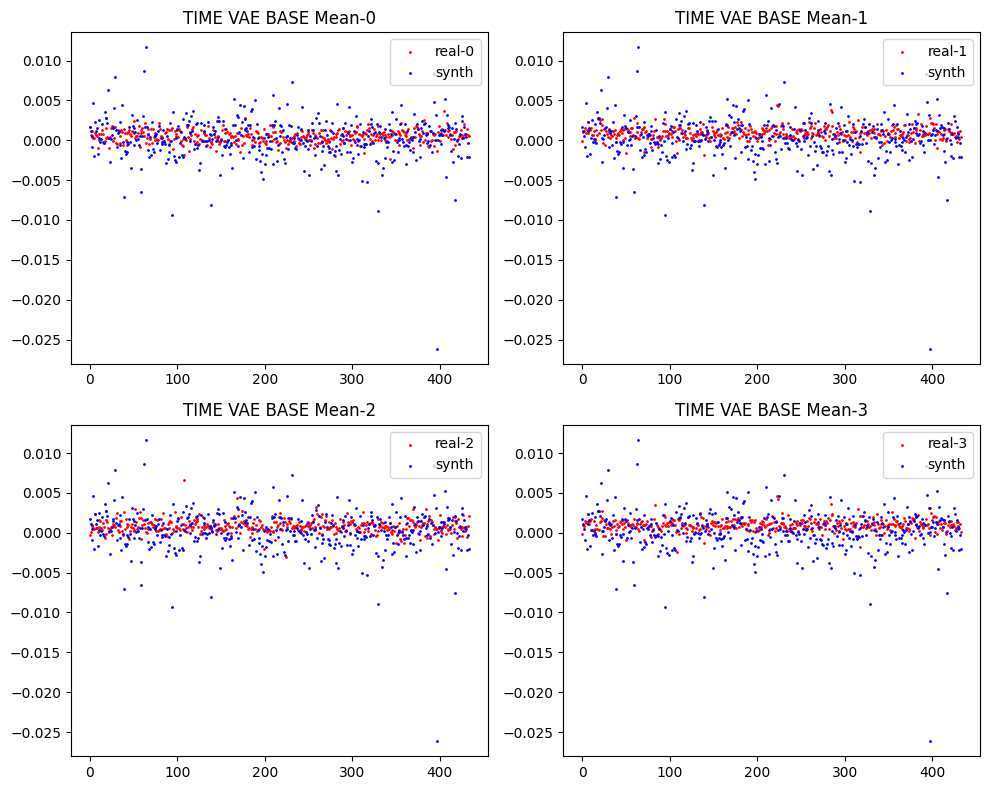

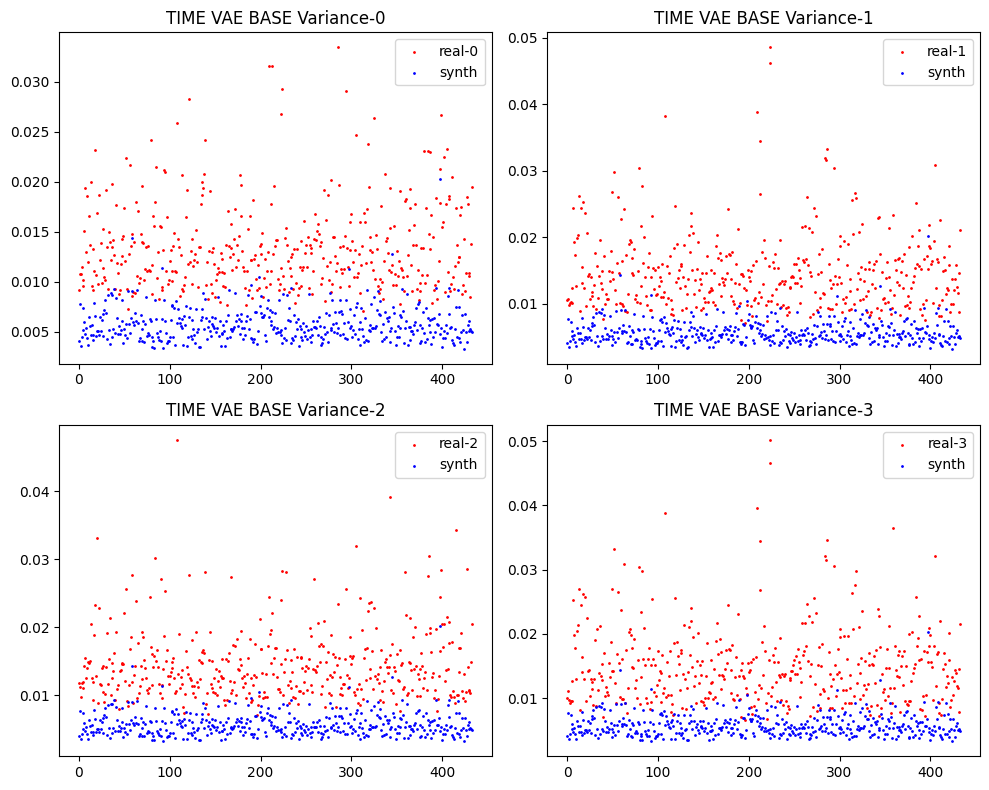

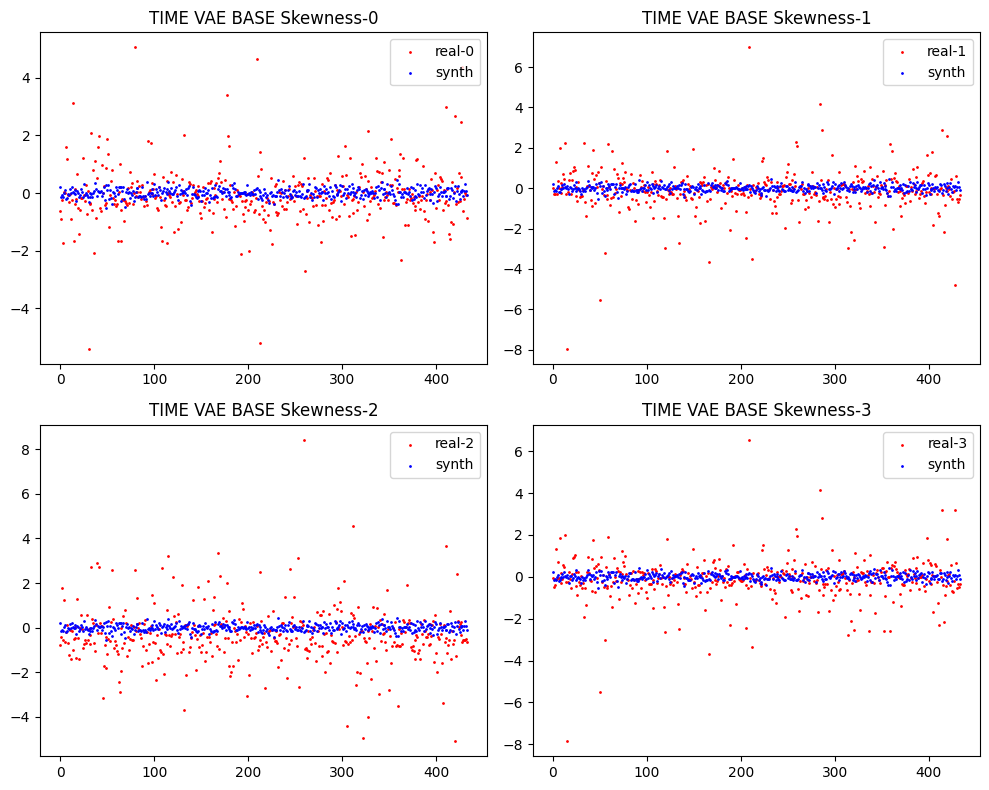

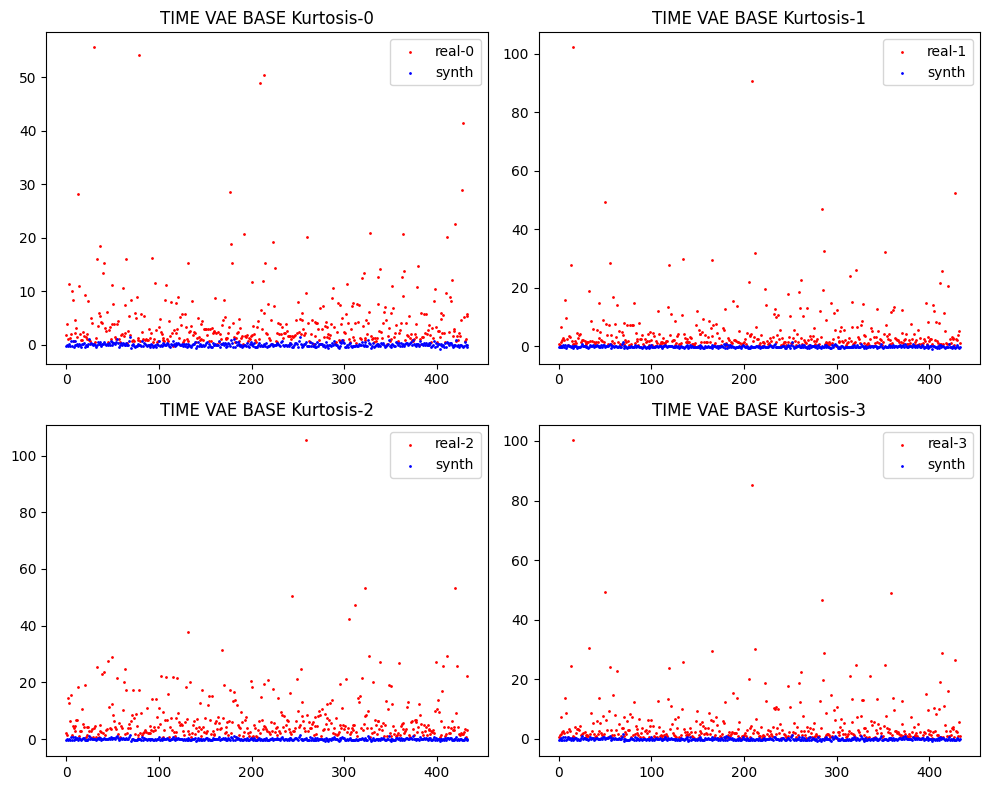

Model:  VAE Convolutional 1 


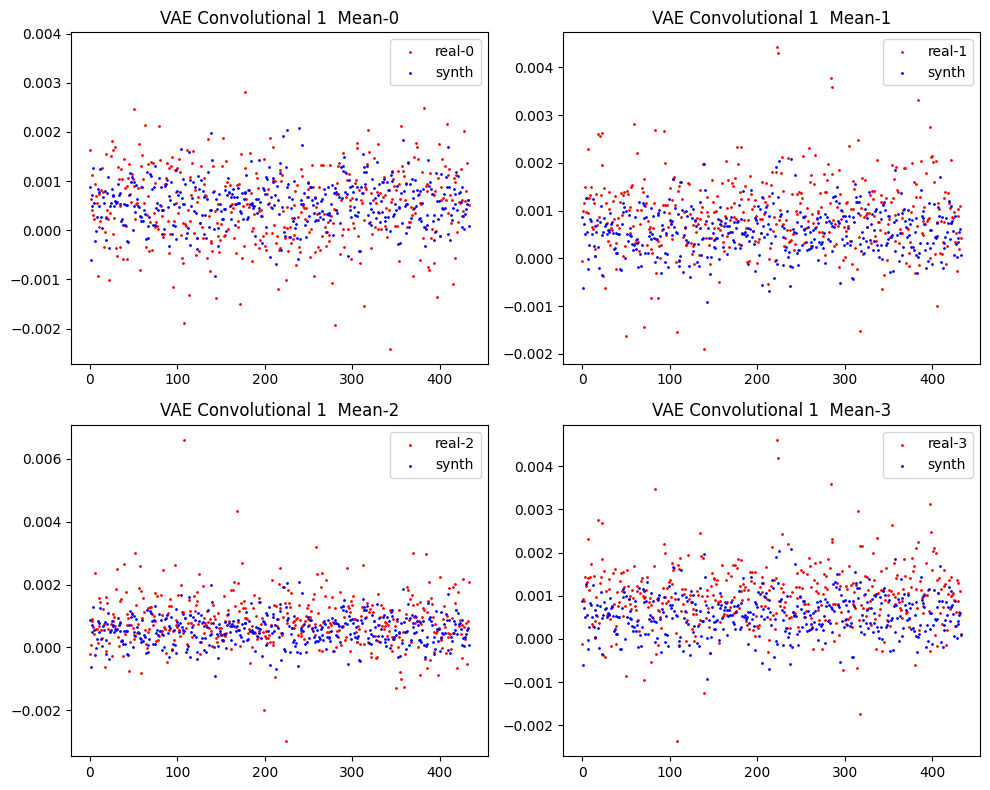

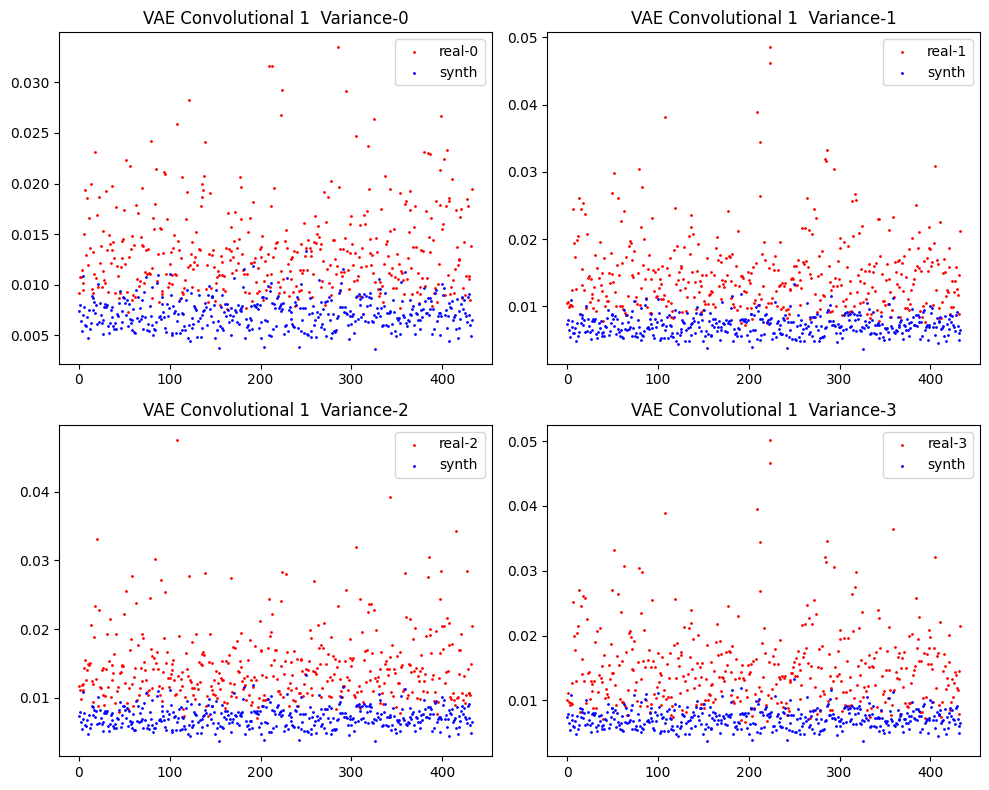

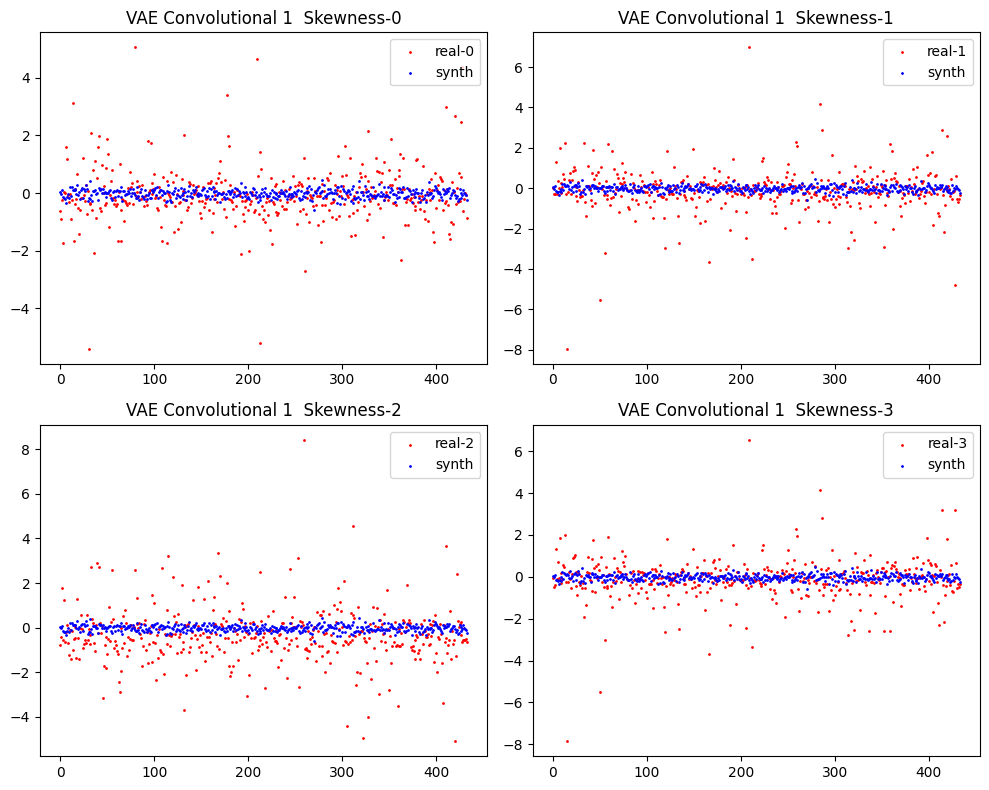

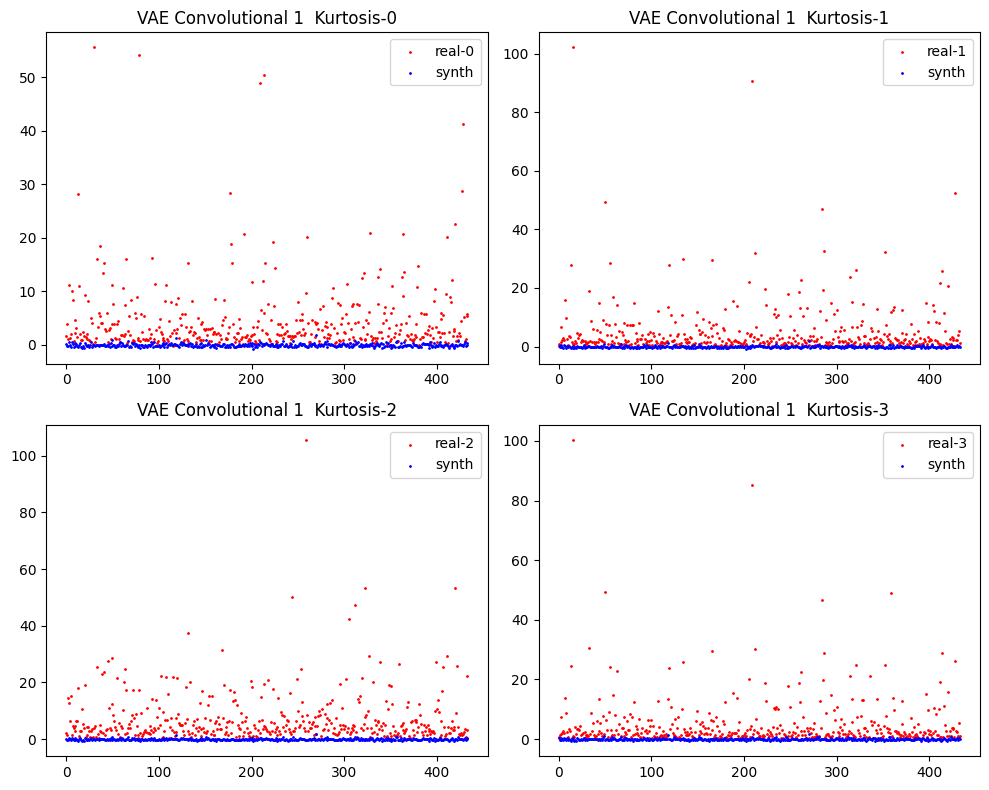

Model:  VAE Convolutional 2


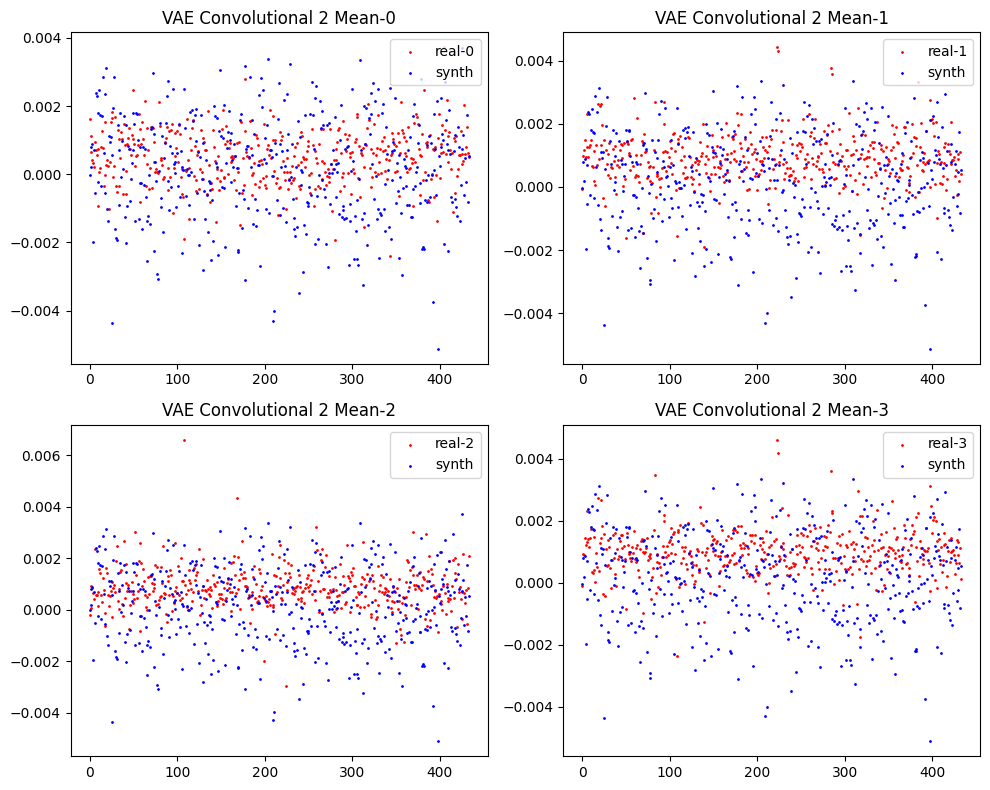

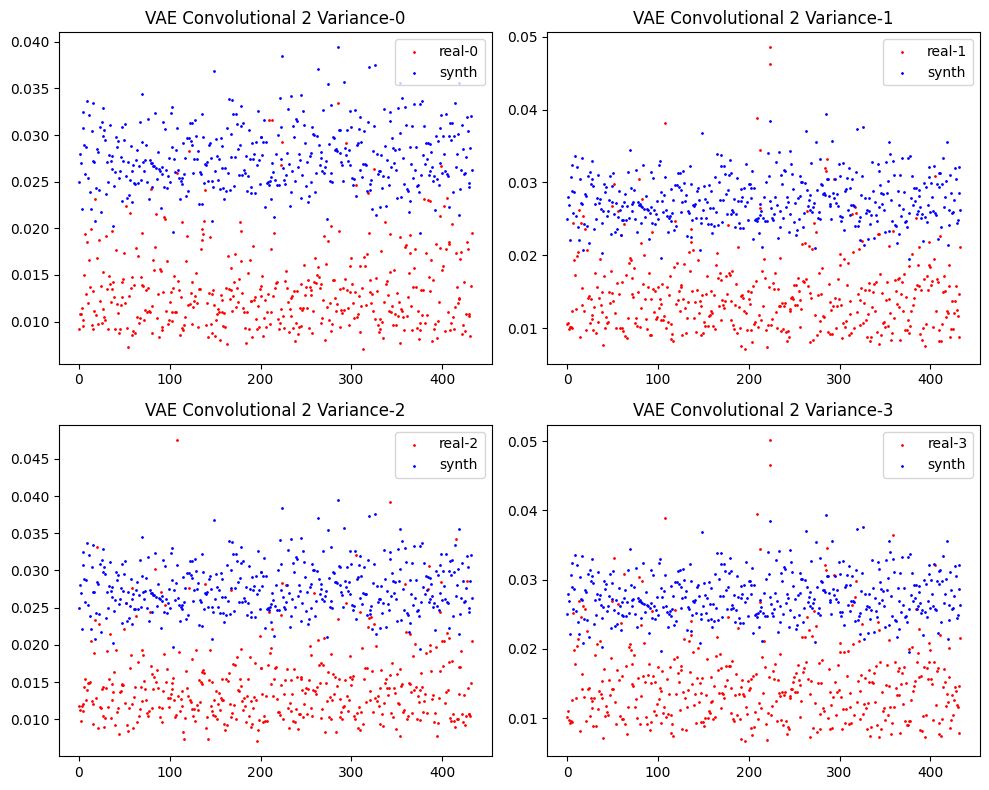

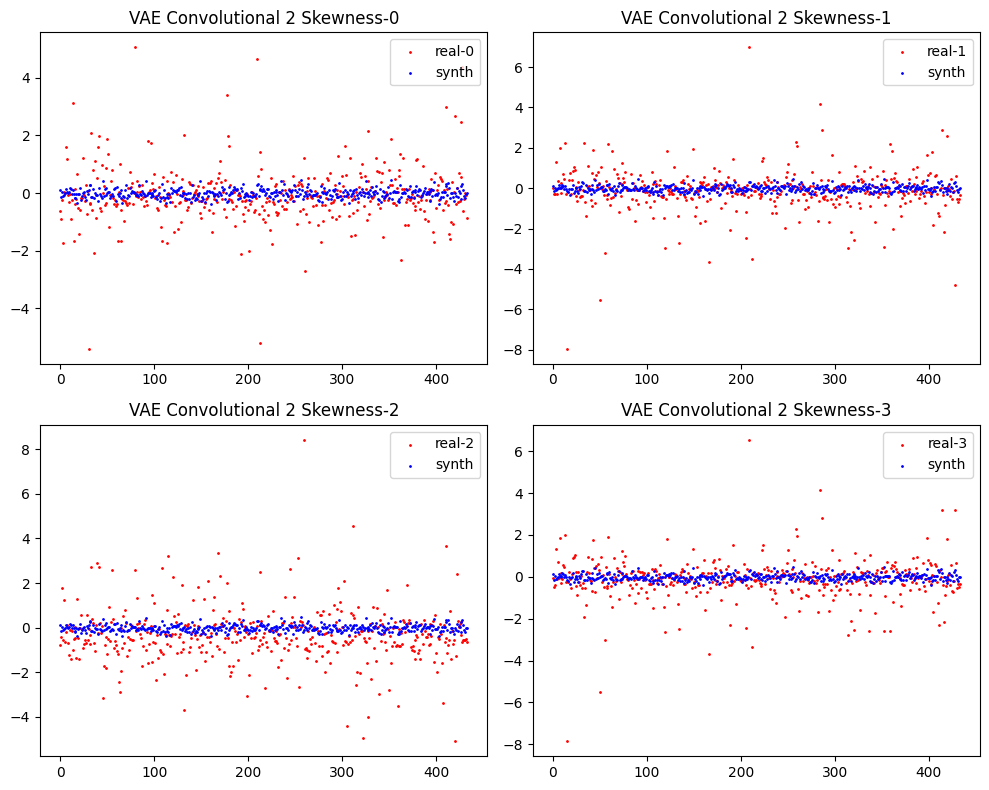

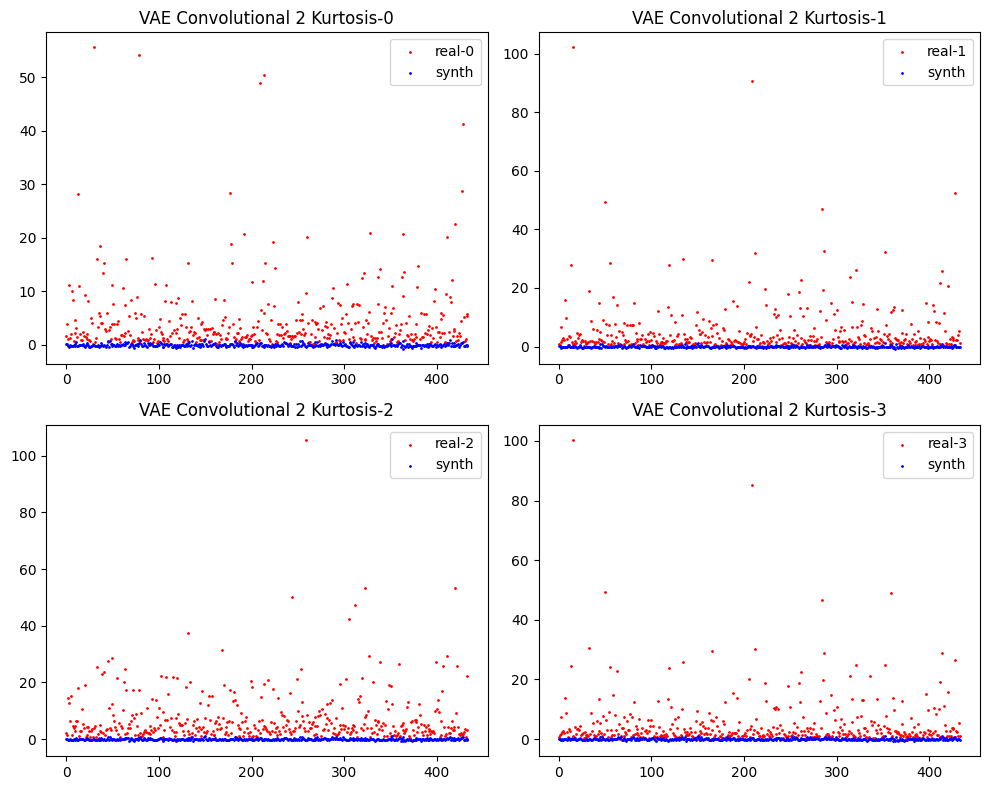

Model:  VAE Dense Layers 1


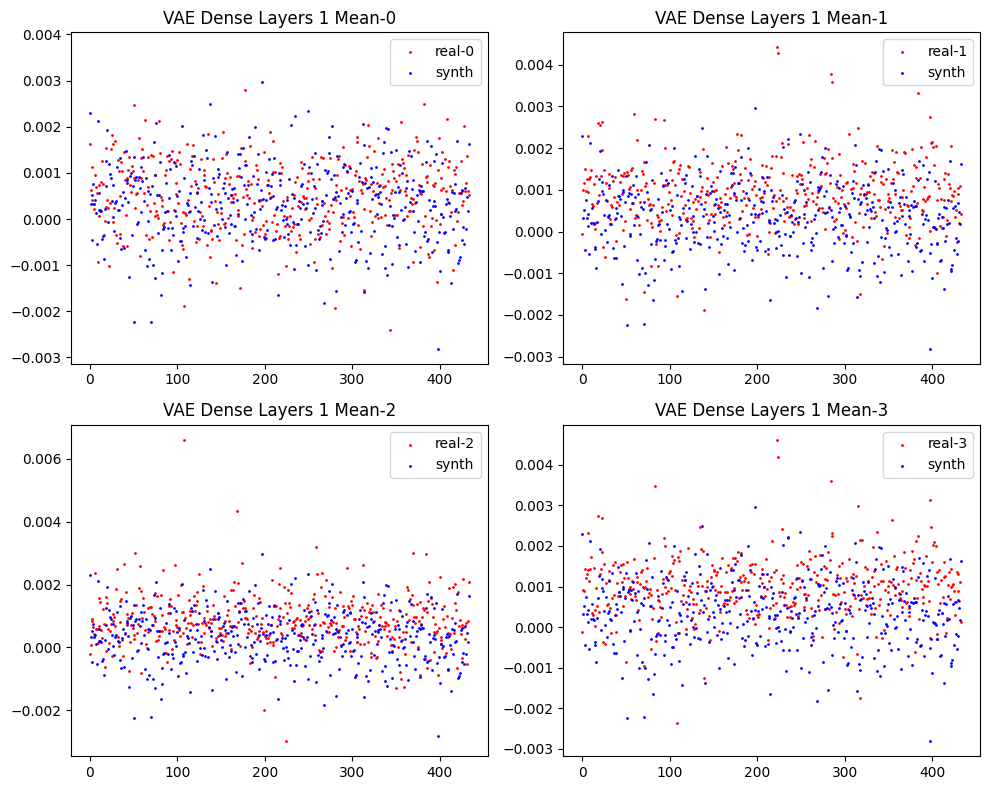

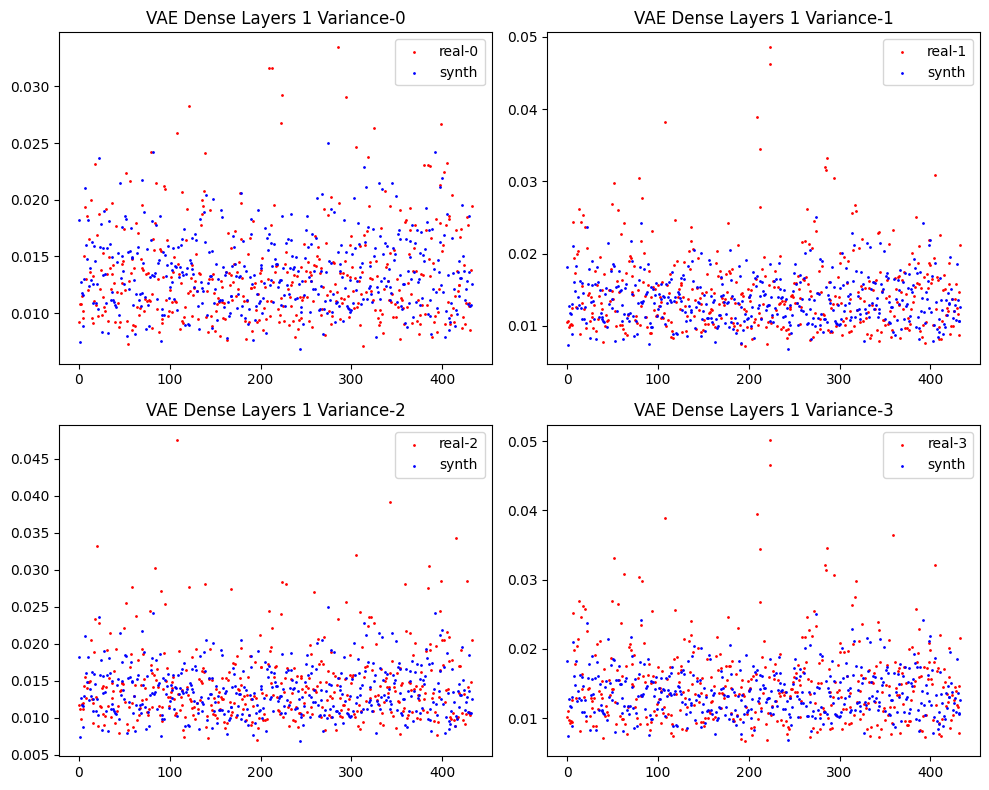

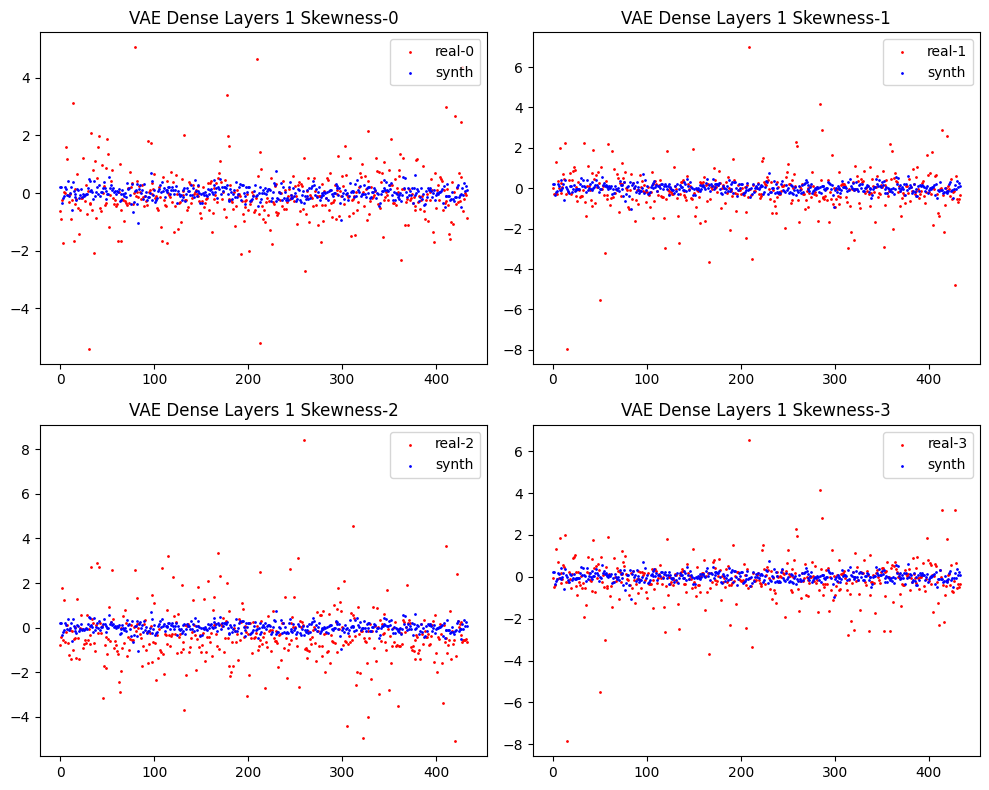

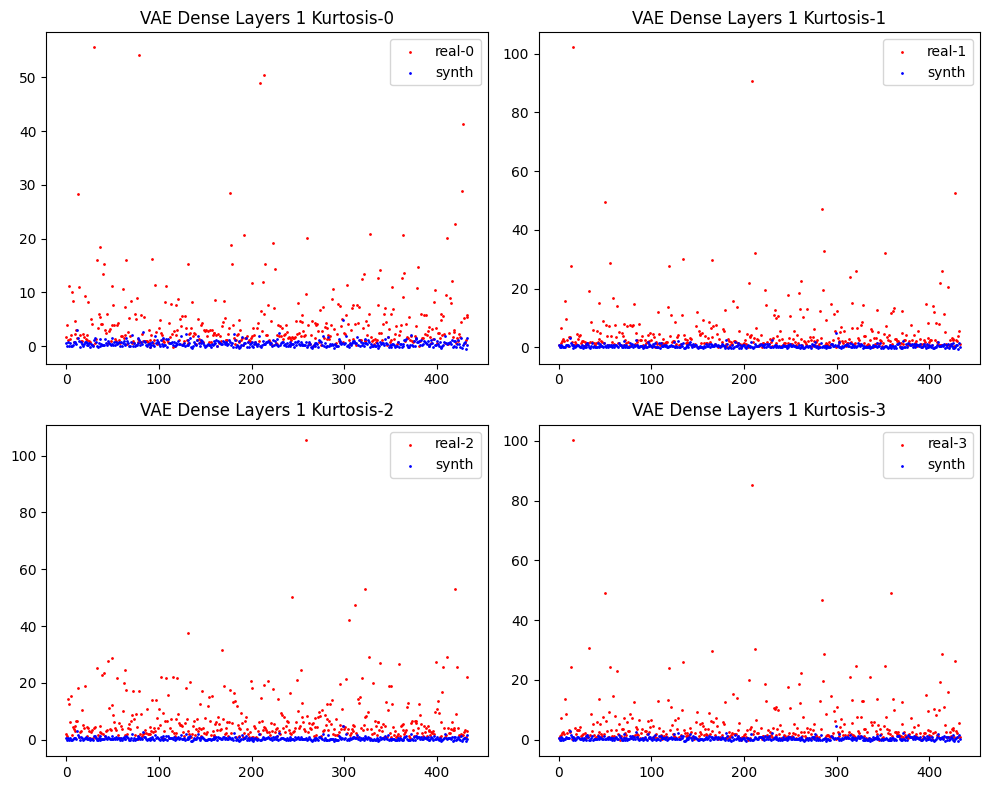

Model:  VAE Dense Layers 2


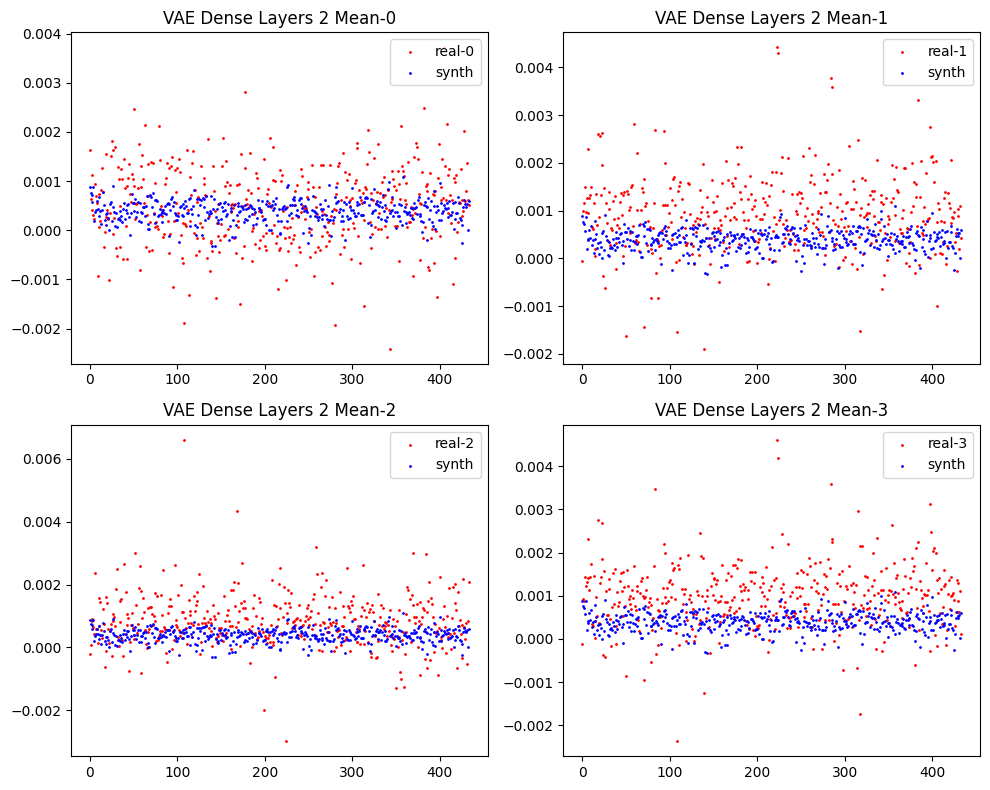

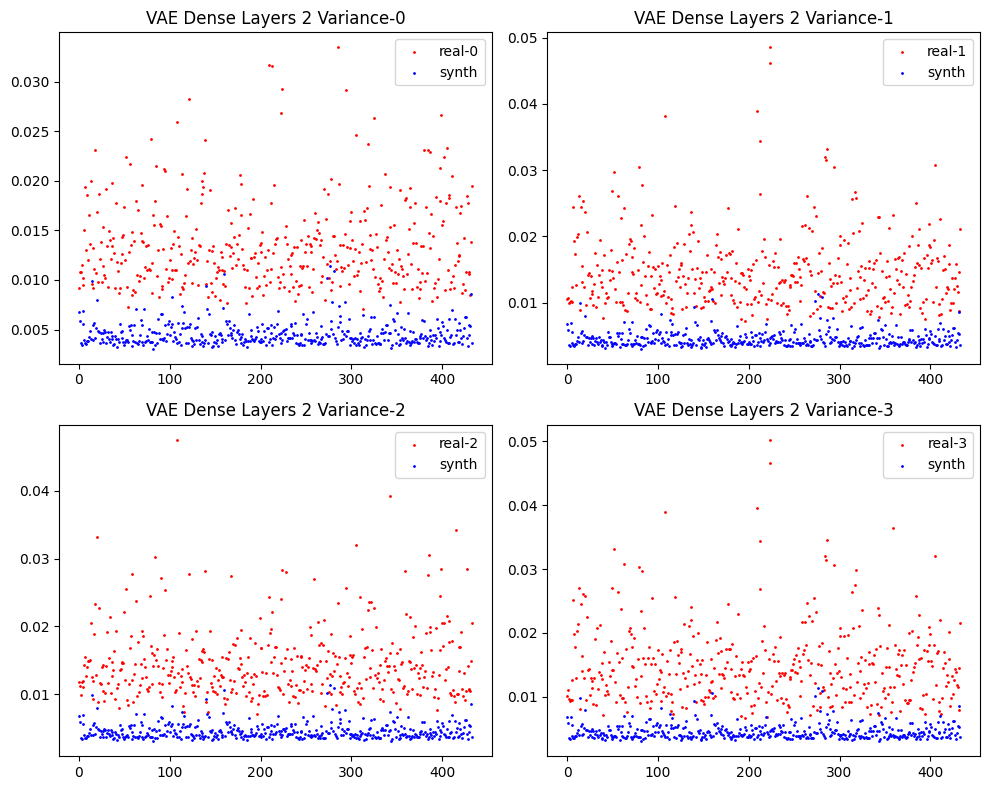

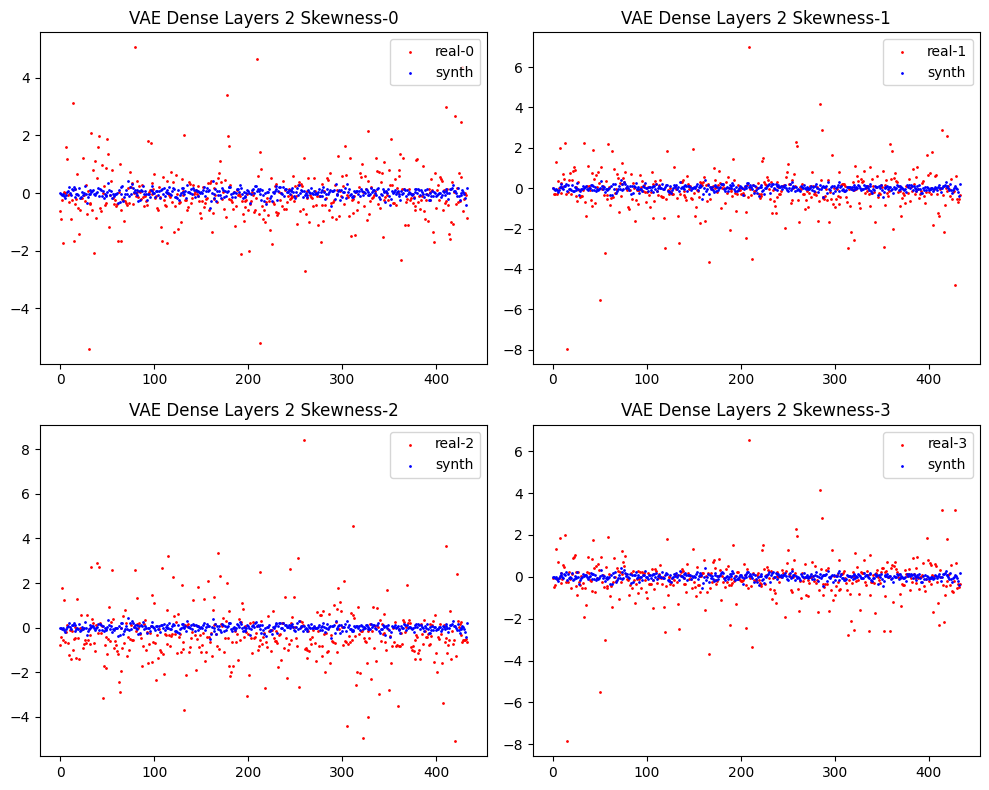

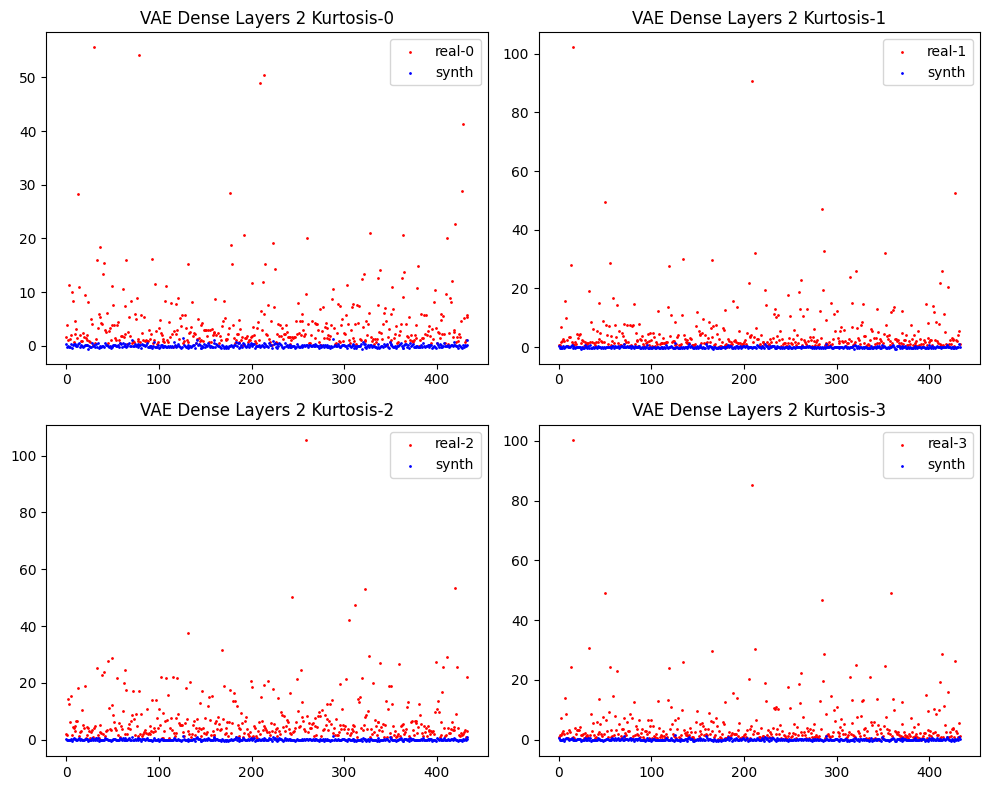

Model:  VQ-VAE Convolutional


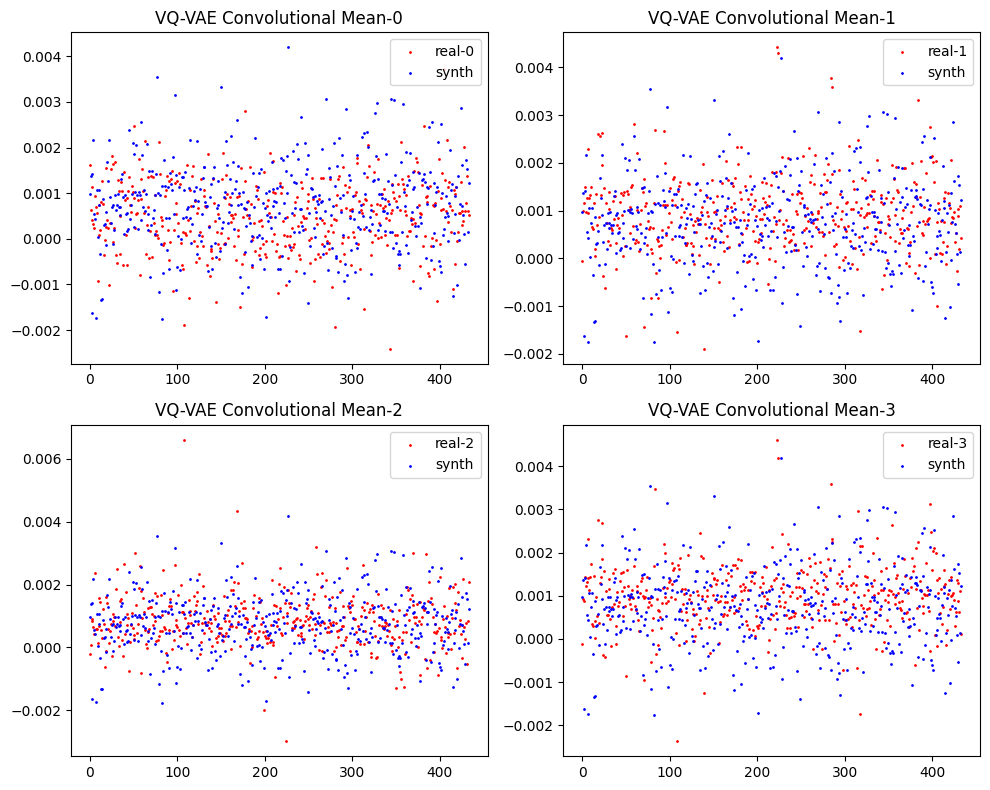

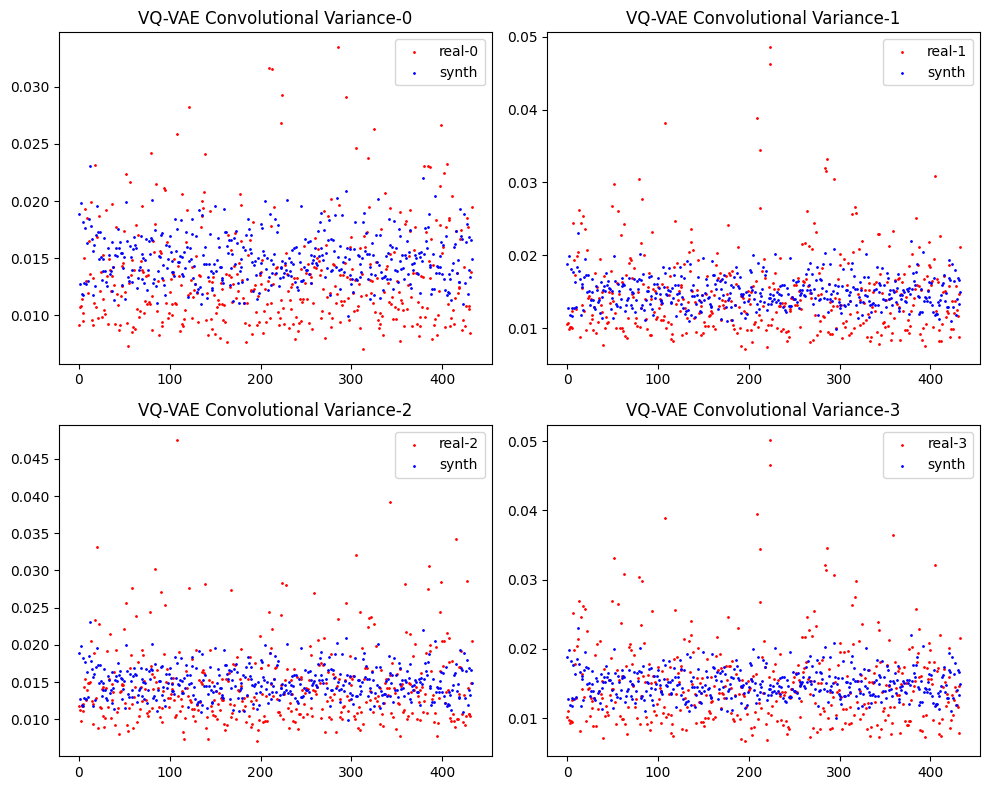

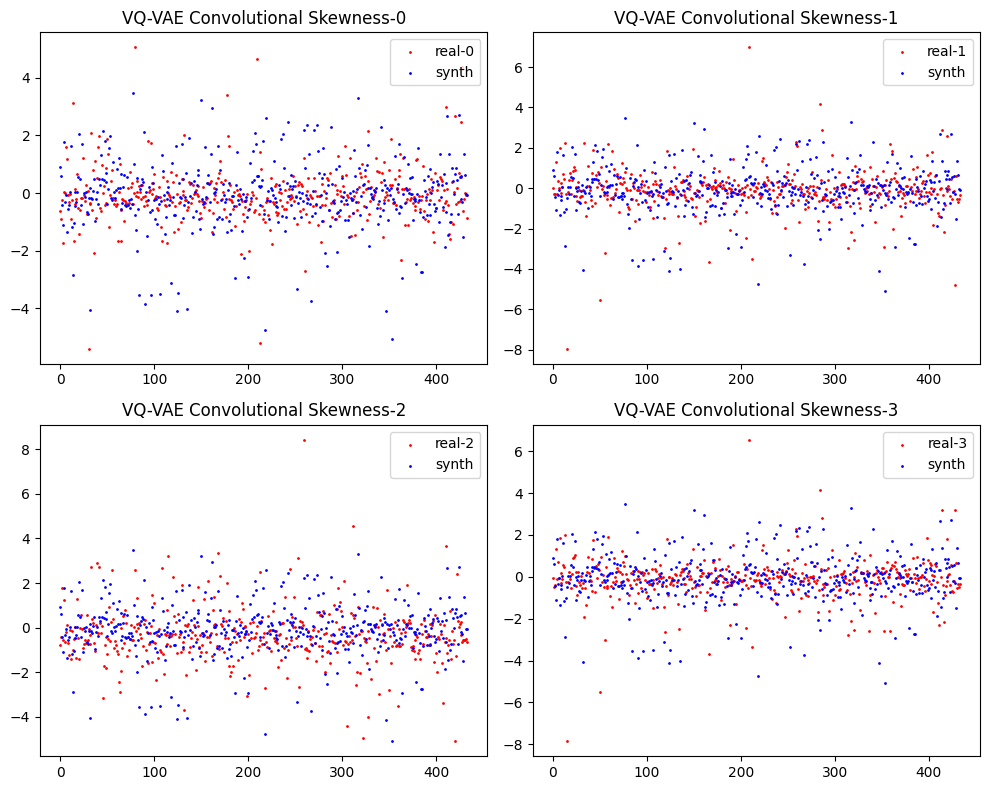

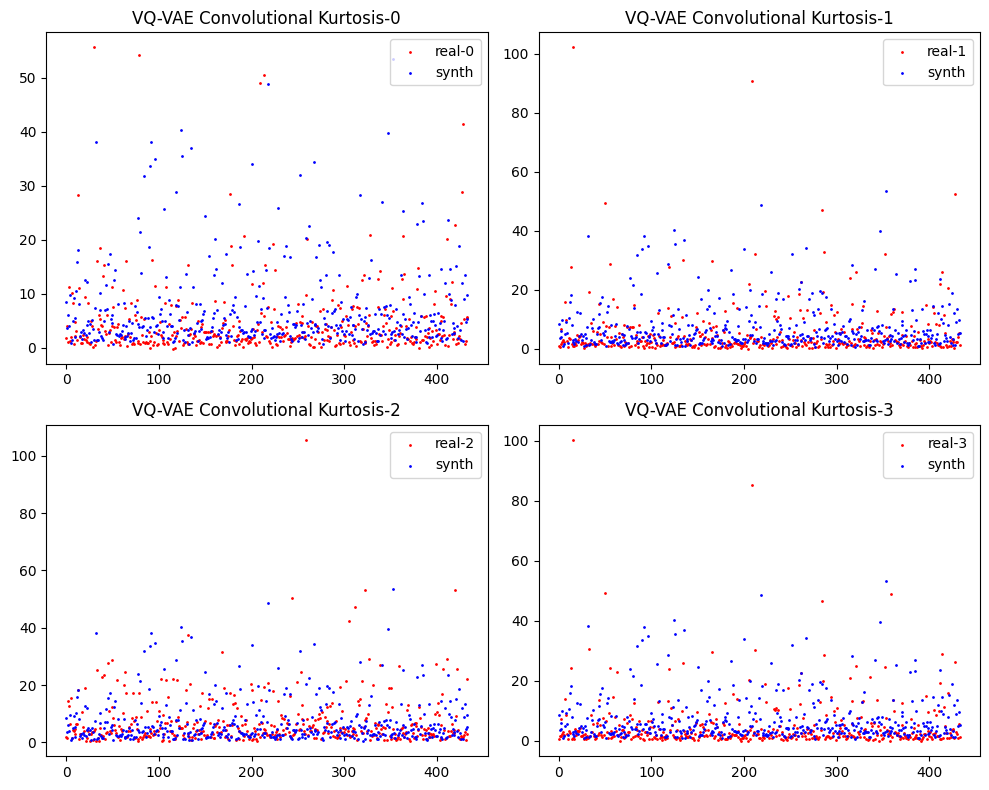

Model:  VQ-VAE Dense Layers


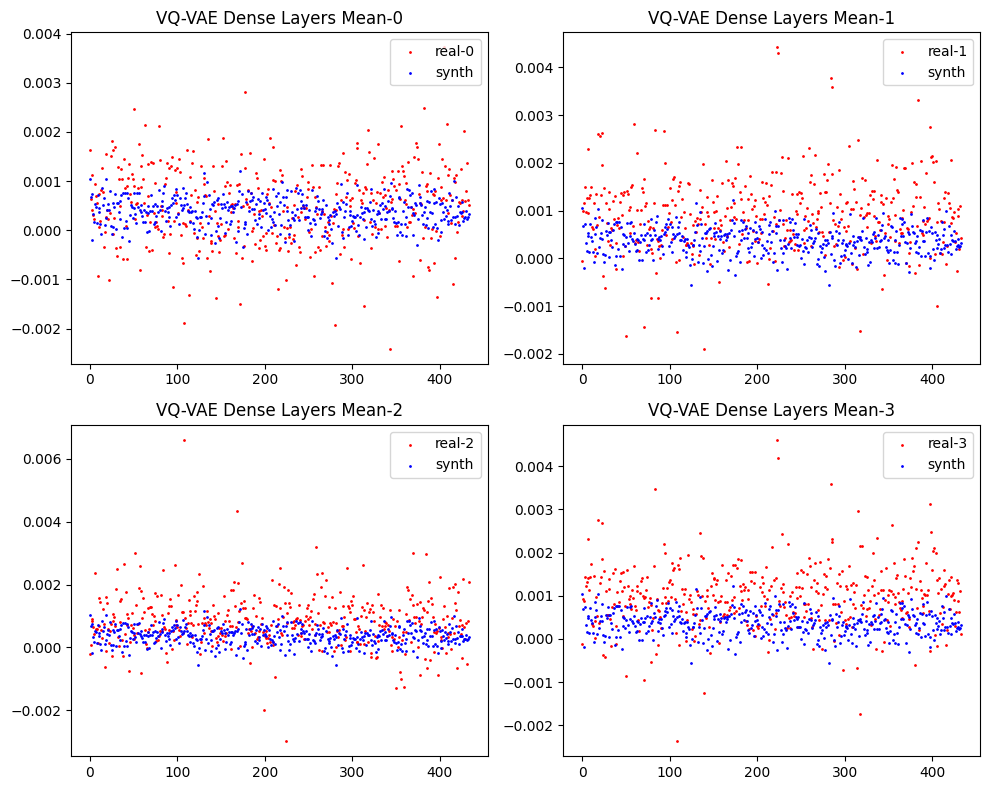

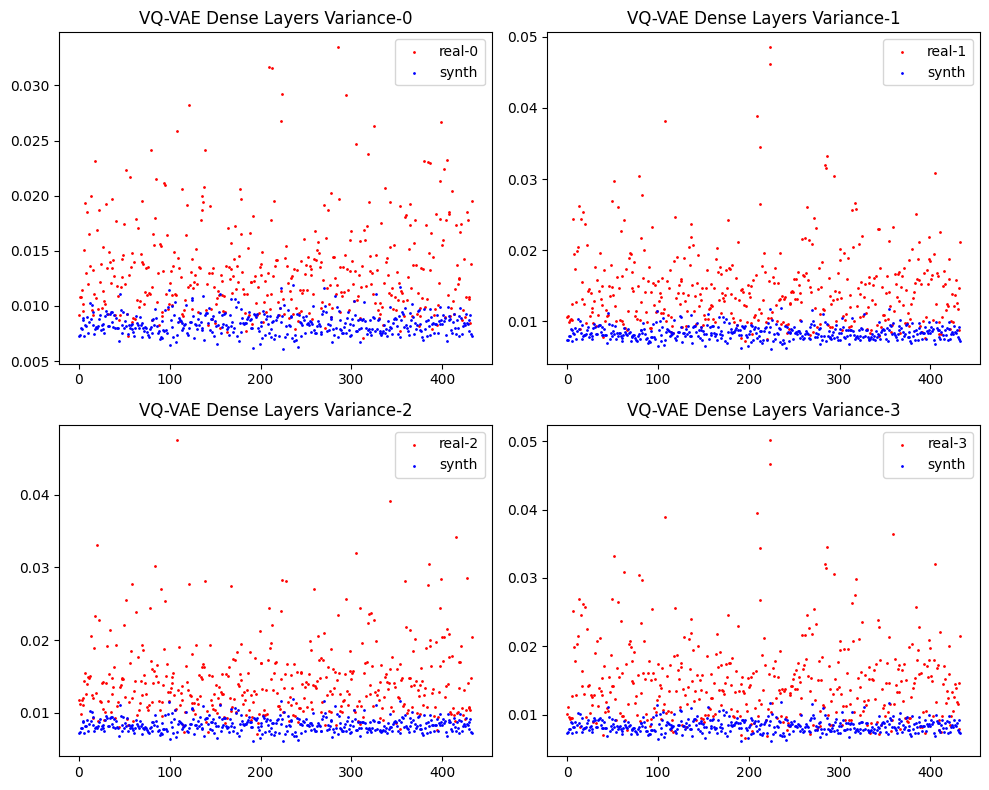

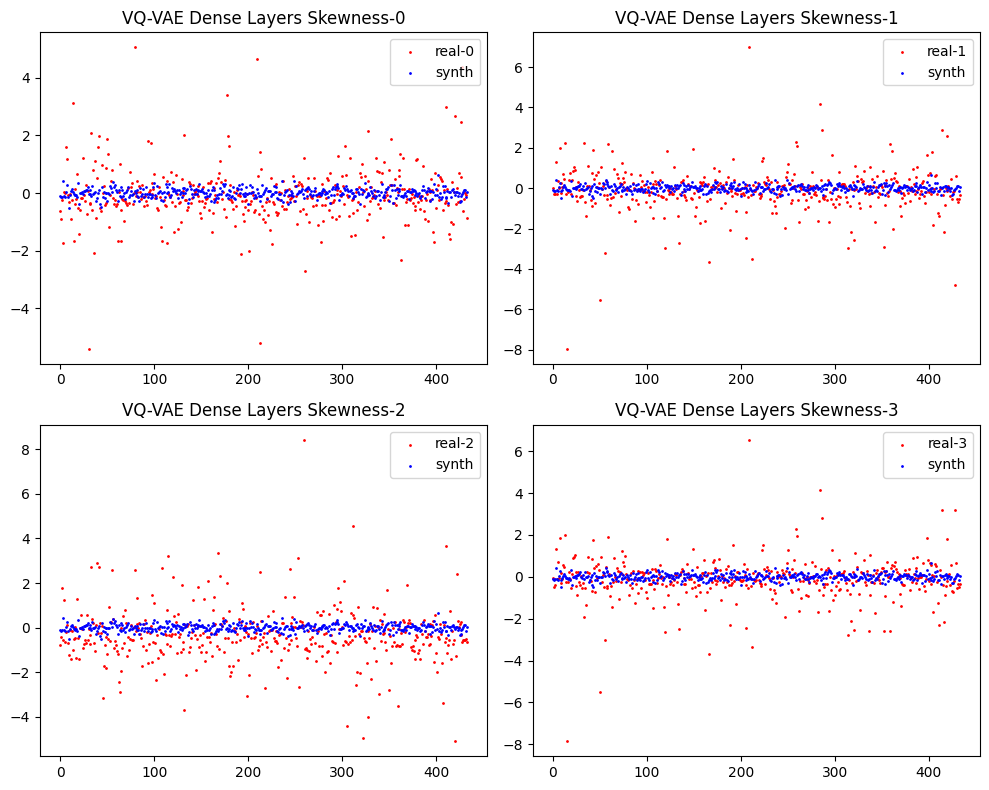

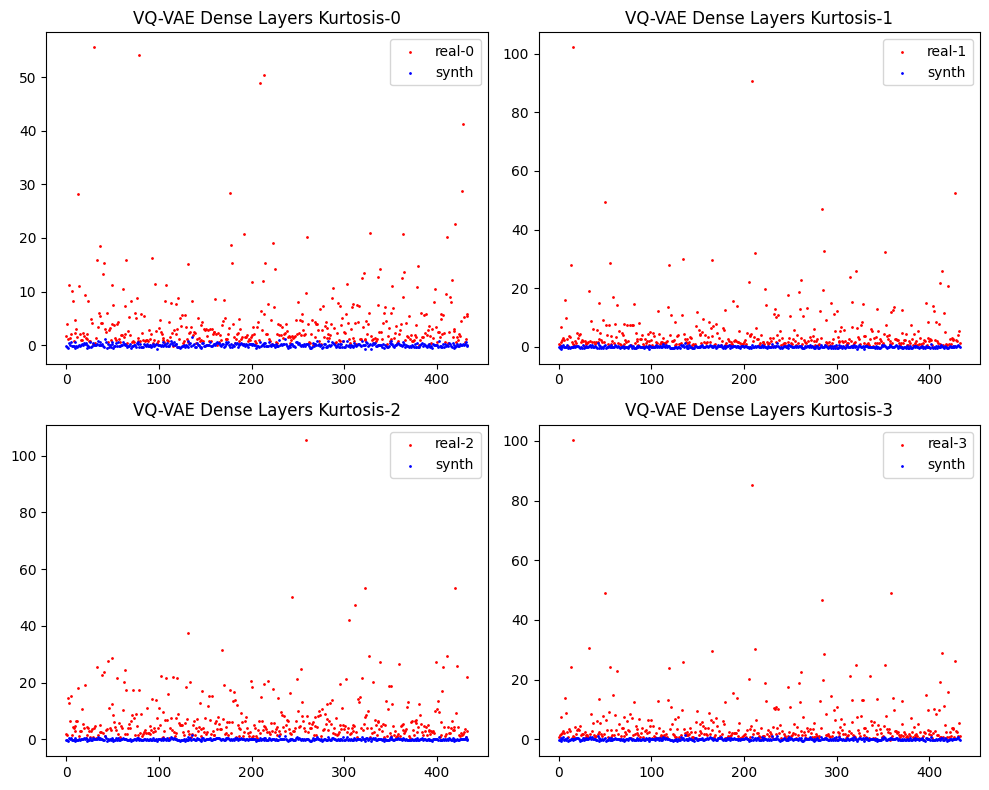

In [13]:
moments = ['Mean', 'Variance', 'Skewness', 'Kurtosis']
x = list(range(stocks))
for model in generated.keys():
    print('Model: ', model)
    for moment in moments:
        fig, axes = plt.subplots(2,2, figsize=(10, 8)) 
        for i in range(4):
            keyd = moment + '_' + str(i)
            y = moments_data[keyd]
            axes[i // 2, i % 2].scatter(x, y, c='red', s=1) 

            keyd = moment + '_' + model
            y = moments_generated[keyd]
            axes[i // 2, i % 2].scatter(x, y, c='blue', s=1)
            axes[i // 2, i % 2].legend(('real-' + str(i), 'synth'), loc='upper right')
            axes[i // 2, i % 2].set_title(model + ' ' + moment + '-' + str(i))
        
        plt.tight_layout()  # To prevent overlapping of subplots
        plt.show()



Model:  TIME VAE BASE


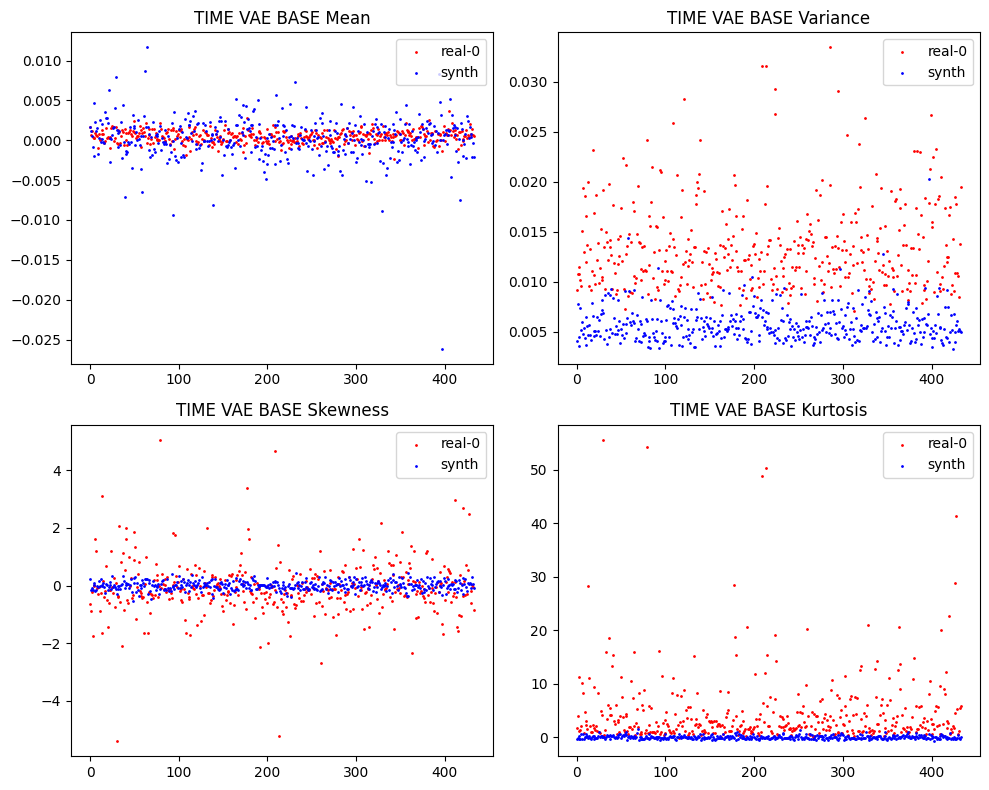

Model:  VAE Convolutional 1 


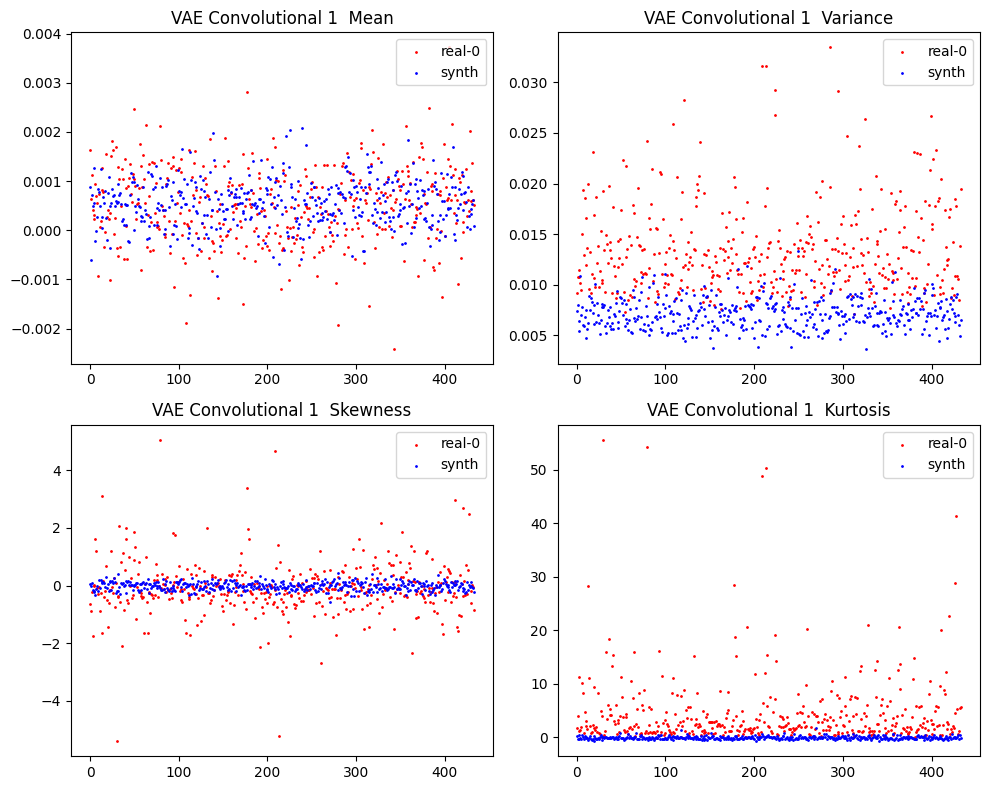

Model:  VAE Convolutional 2


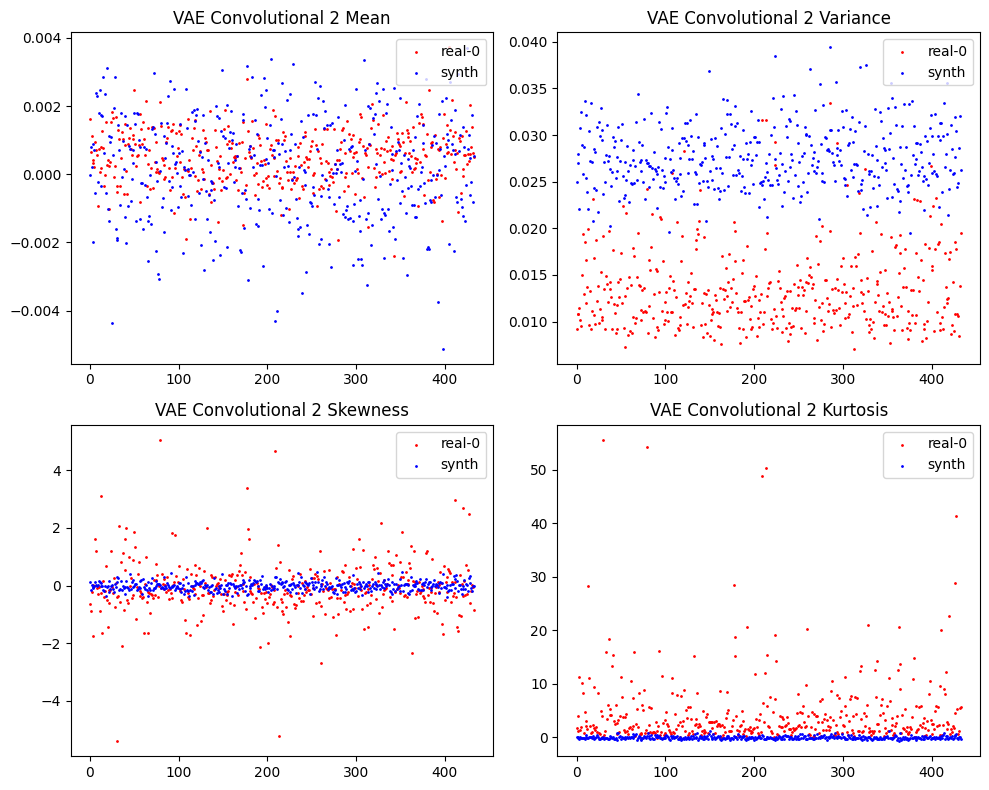

Model:  VAE Dense Layers 1


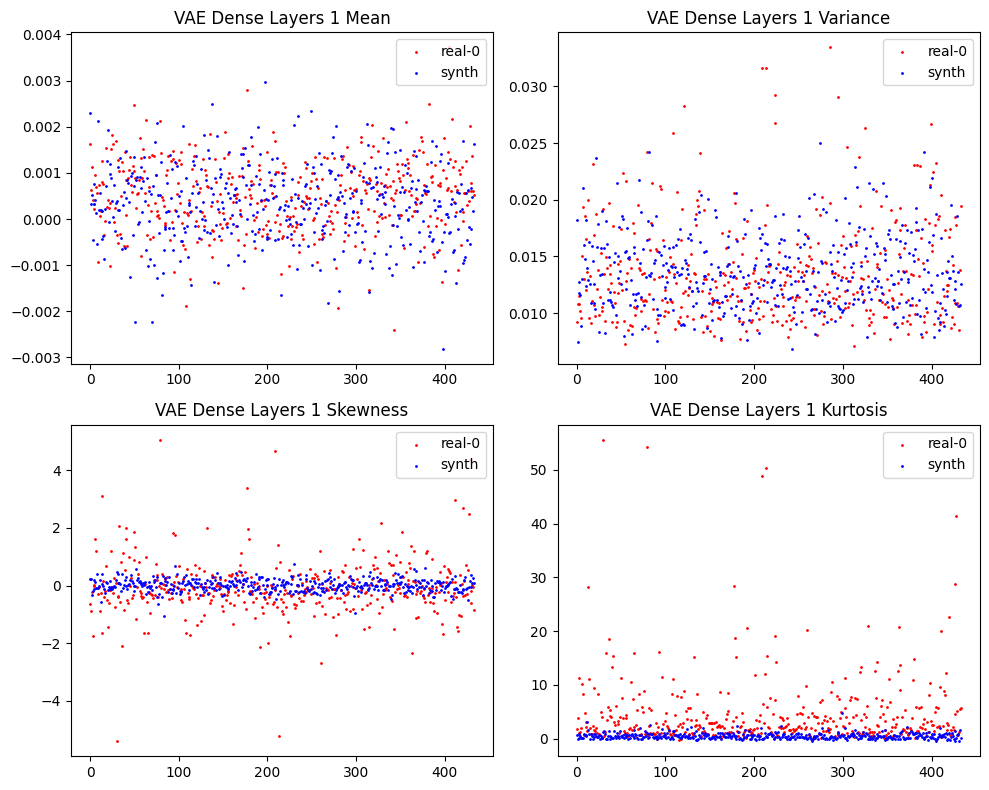

Model:  VAE Dense Layers 2


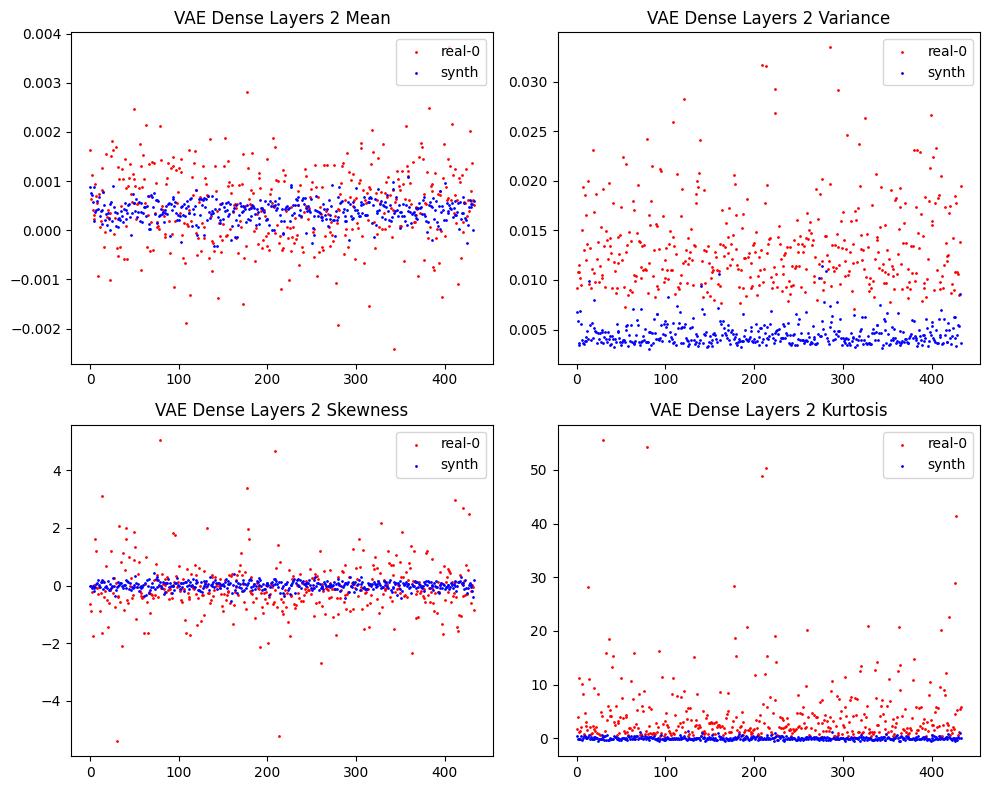

Model:  VQ-VAE Convolutional


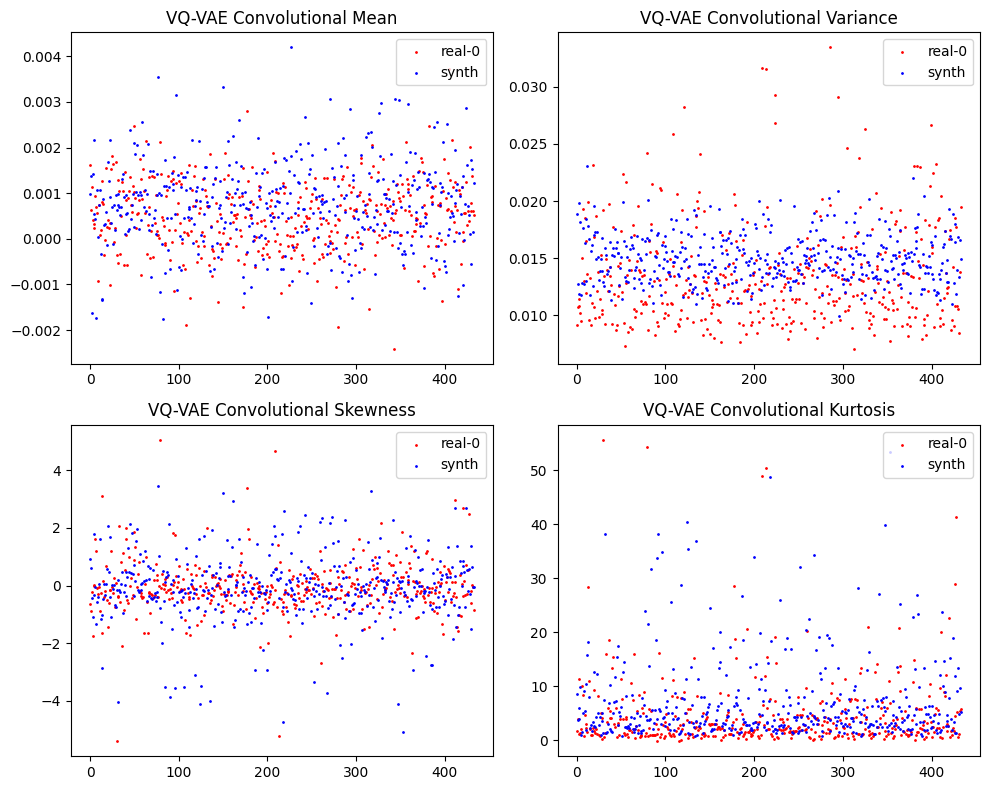

Model:  VQ-VAE Dense Layers


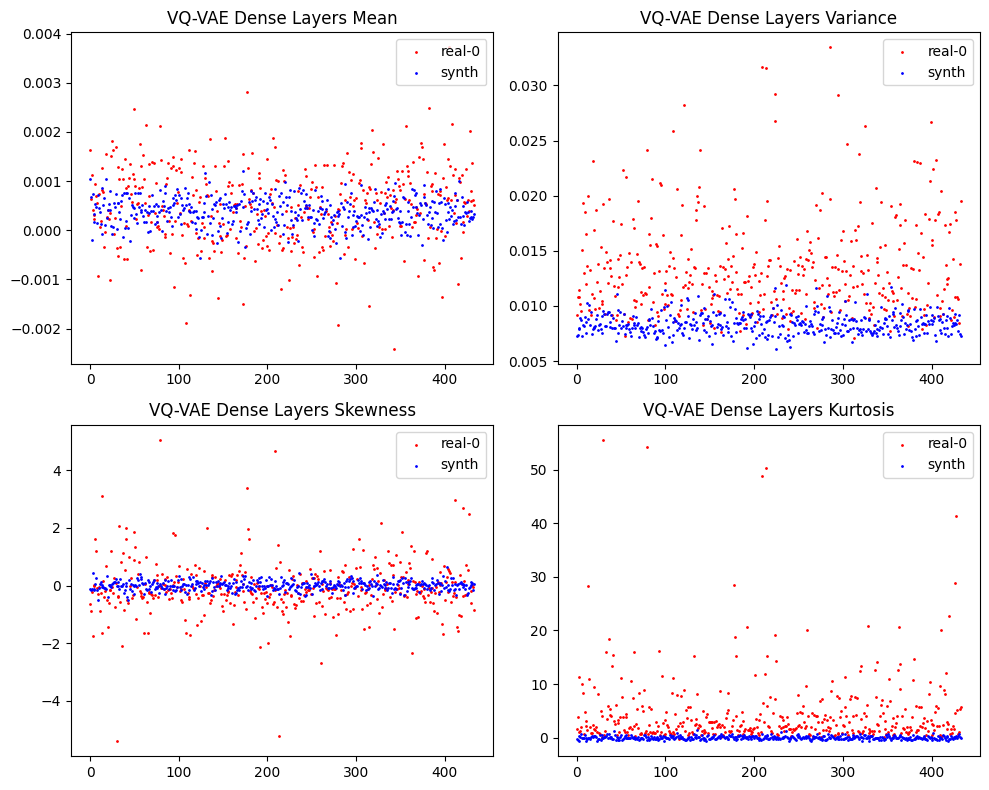

In [14]:
moments = ['Mean', 'Variance', 'Skewness', 'Kurtosis']
x = list(range(stocks))
i=0
for model in generated.keys():
    print('Model: ', model)
    fig, axes = plt.subplots(2,2, figsize=(10, 8)) 
    for i, moment in enumerate(moments):
        
        # for i in range(4):
        keyd = moment + '_' + str(0)
        y = moments_data[keyd]
        axes[i // 2, i % 2].scatter(x, y, c='red', s=1) 

        keyd = moment + '_' + model
        y = moments_generated[keyd]
        axes[i // 2, i % 2].scatter(x, y, c='blue', s=1)
        axes[i // 2, i % 2].legend(('real-' + str(0), 'synth'), loc='upper right')
        axes[i // 2, i % 2].set_title(model + ' ' + moment )
    
    plt.tight_layout()  # To prevent overlapping of subplots
    plt.show()

# Autocorrelation plot

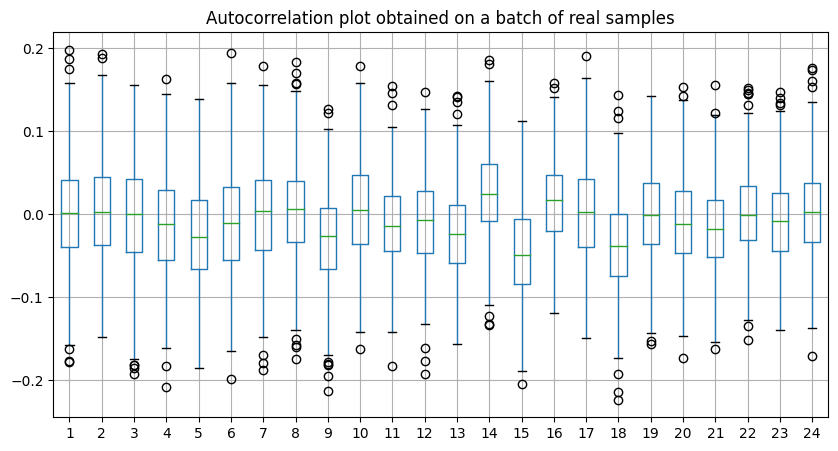

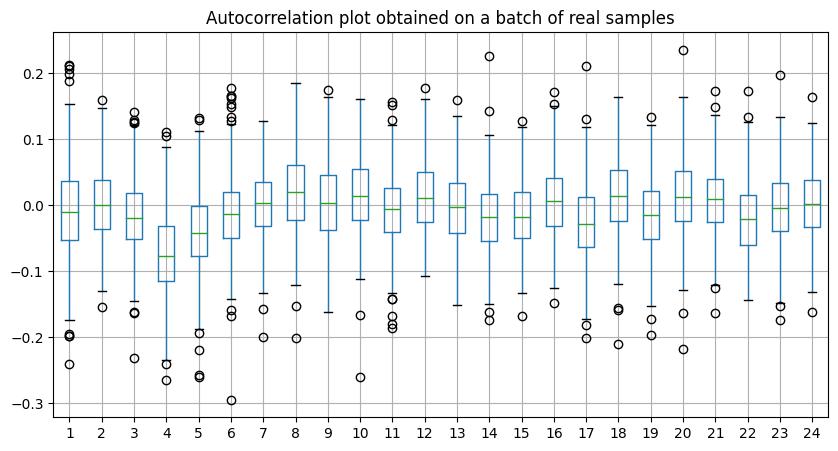

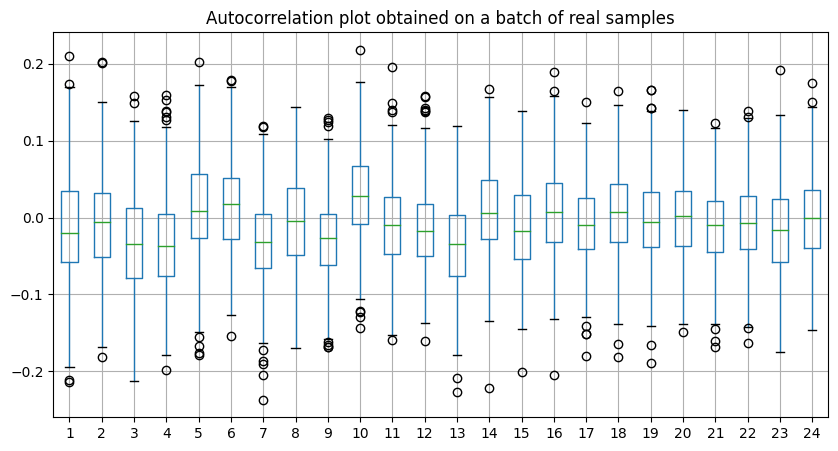

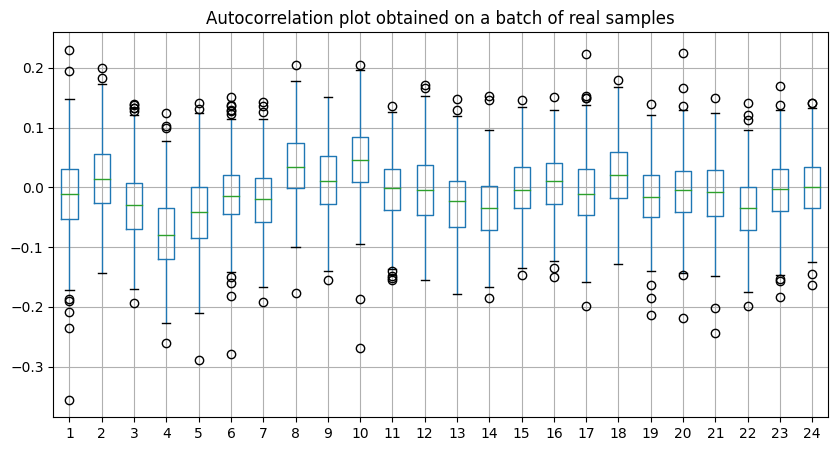

In [77]:
title = 'Autocorrelation plot obtained on a batch of real samples'
for batch in data_eval: 
    df = acf_batch(batch)
    df.boxplot(figsize=(10, 5))
    plt.title(title)
    plt.show()

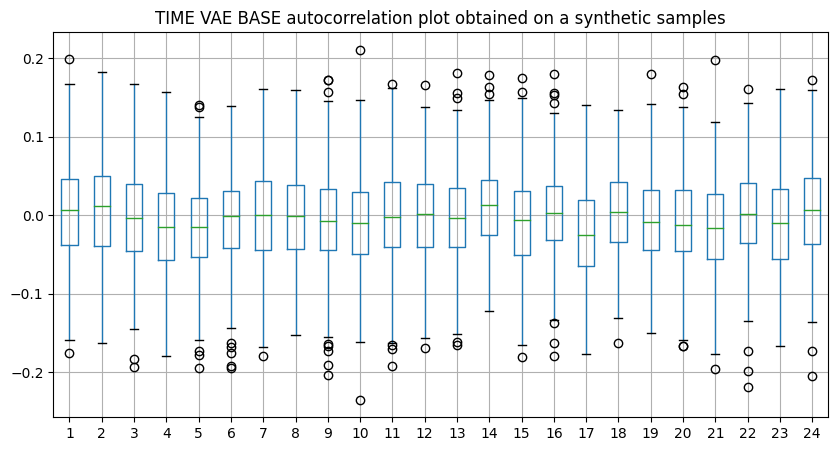

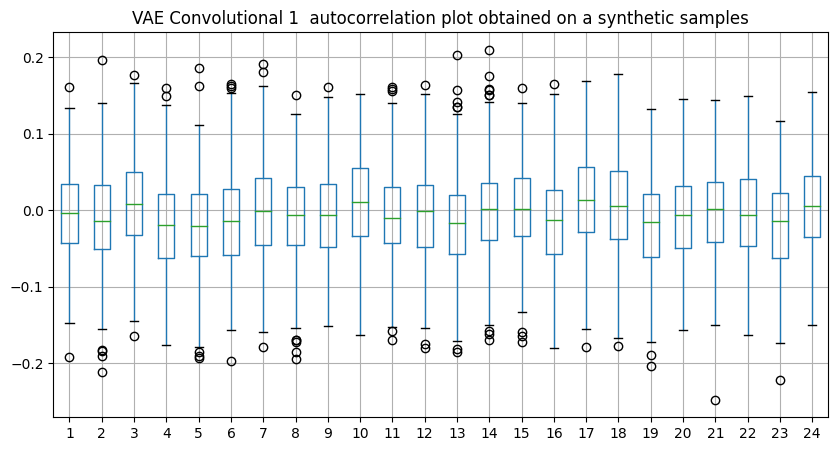

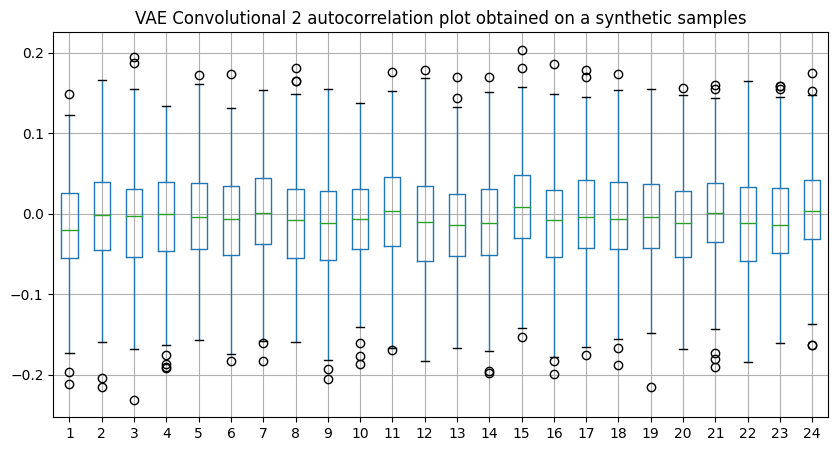

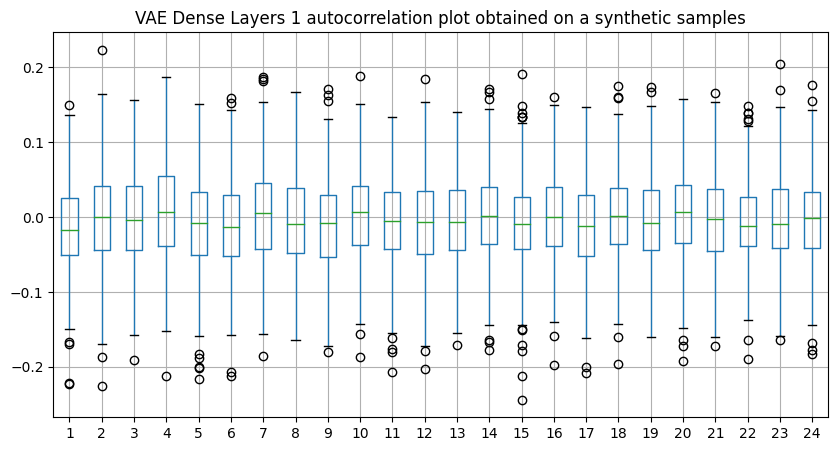

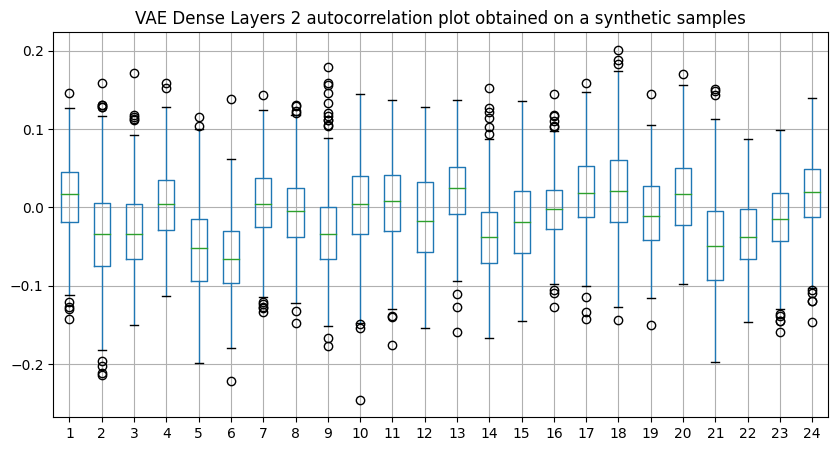

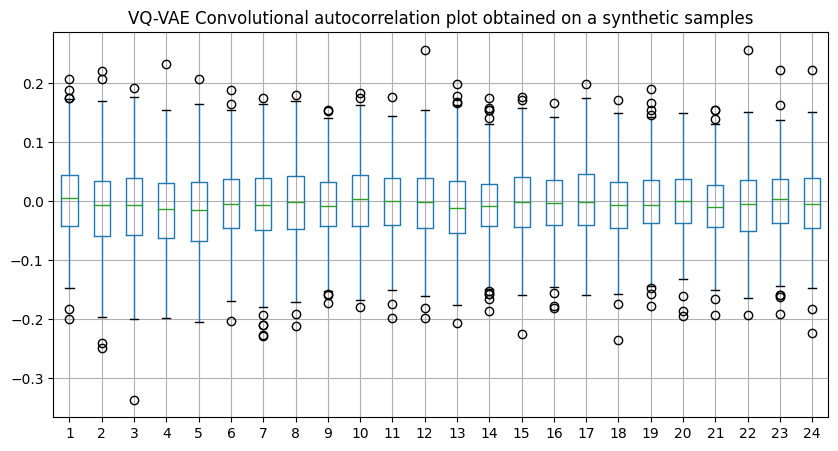

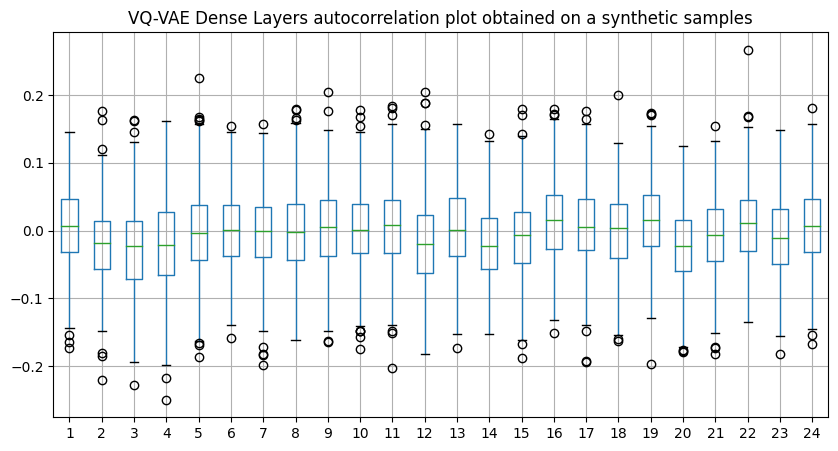

In [15]:
for k, v, in generated.items():
    title = k +' autocorrelation plot obtained on a synthetic samples'
    df = acf_batch(v)
    df.boxplot(figsize=(10, 5))
    plt.title(title)
    plt.show()

# Cluster volatility 

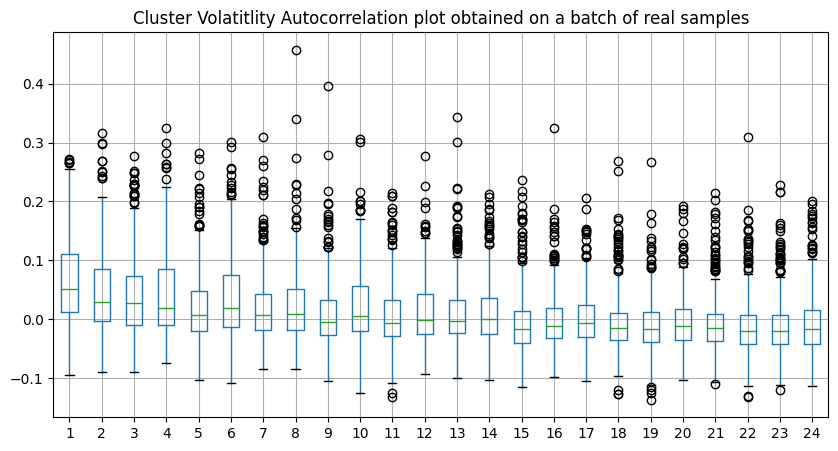

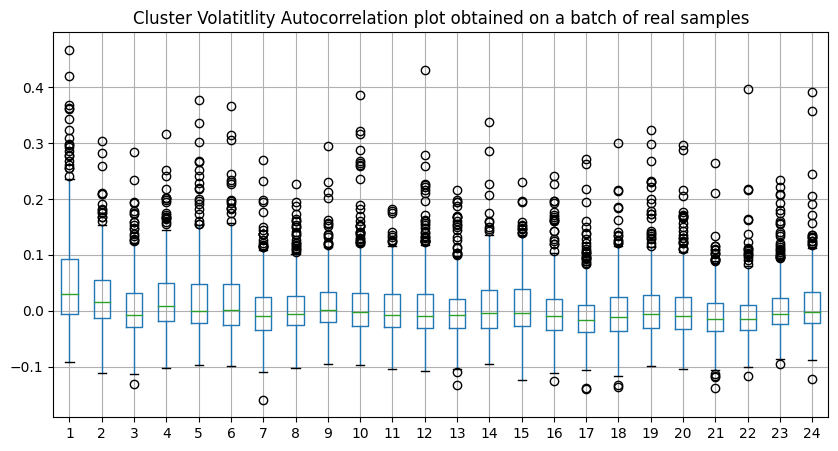

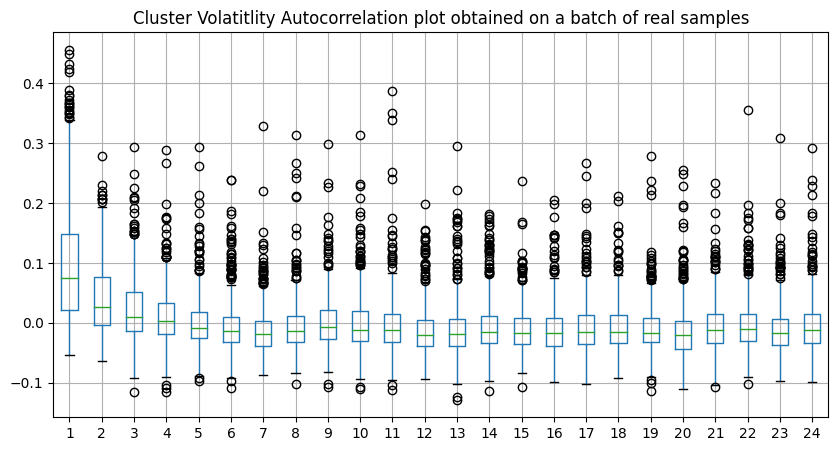

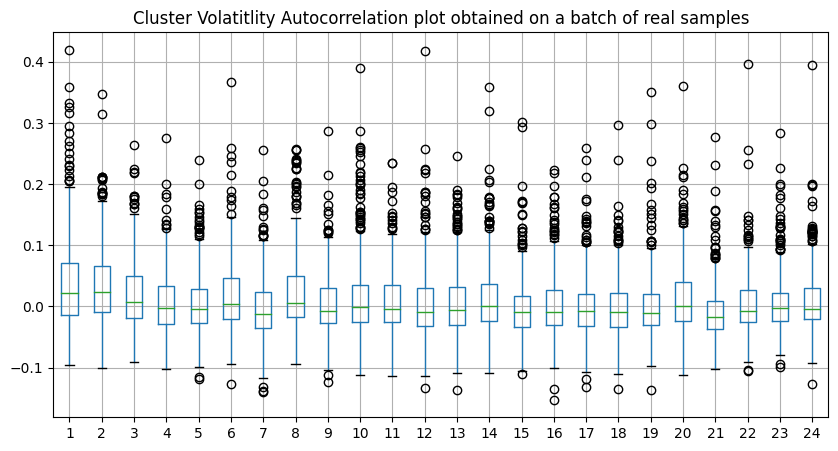

In [16]:
title = 'Cluster Volatitlity Autocorrelation plot obtained on a batch of real samples'
for batch in data_eval: 
    df = acf_batch(batch, square=True)
    df.boxplot(figsize=(10, 5))
    plt.title(title)
    plt.show()

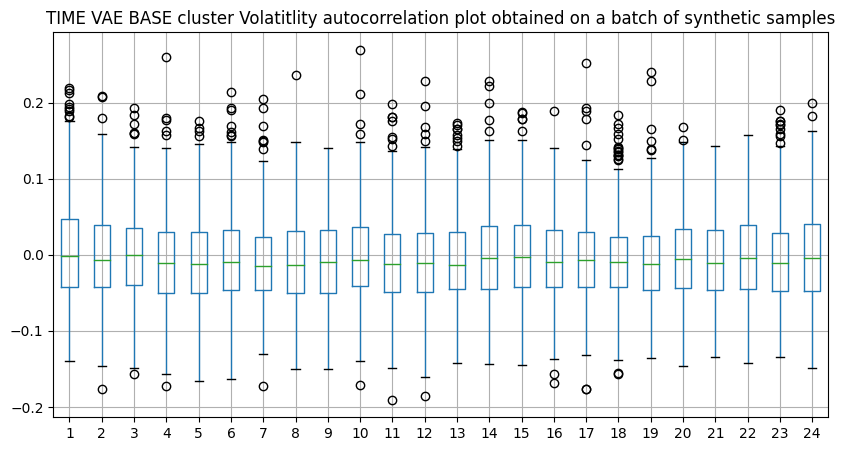

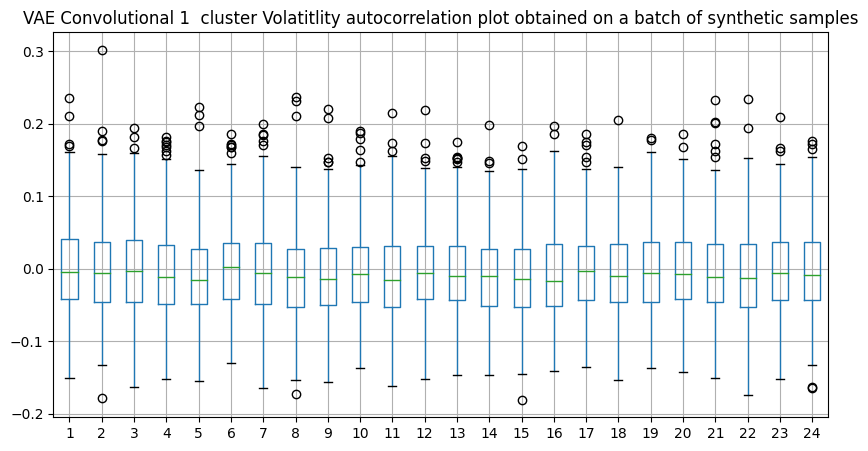

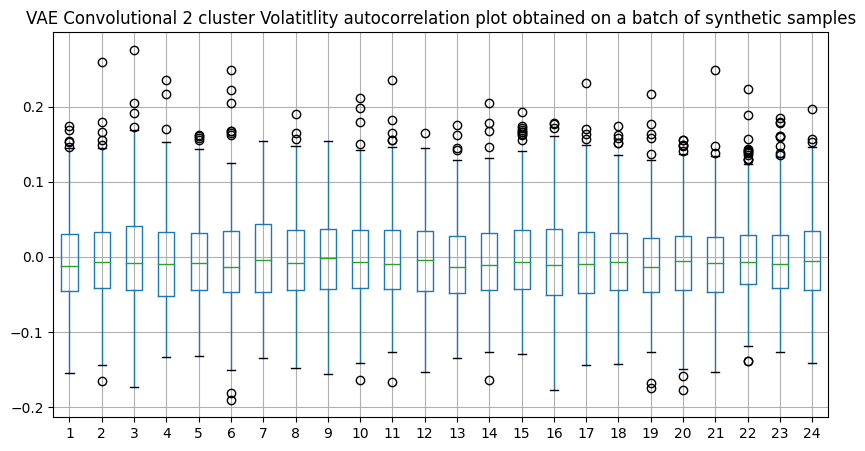

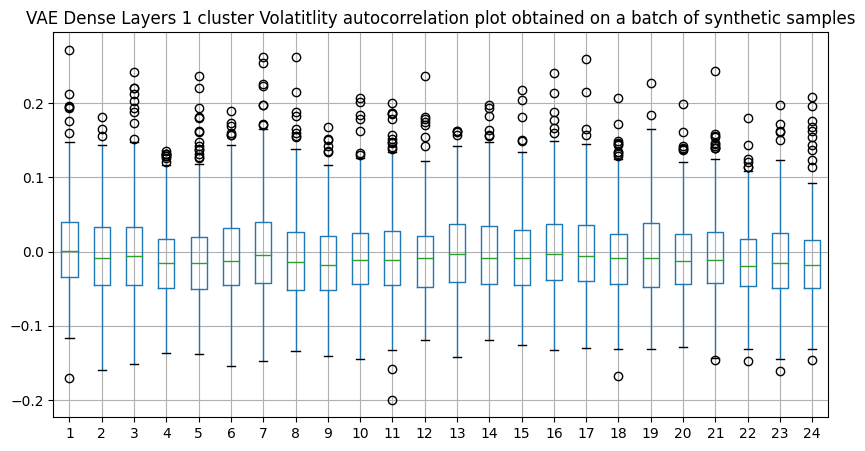

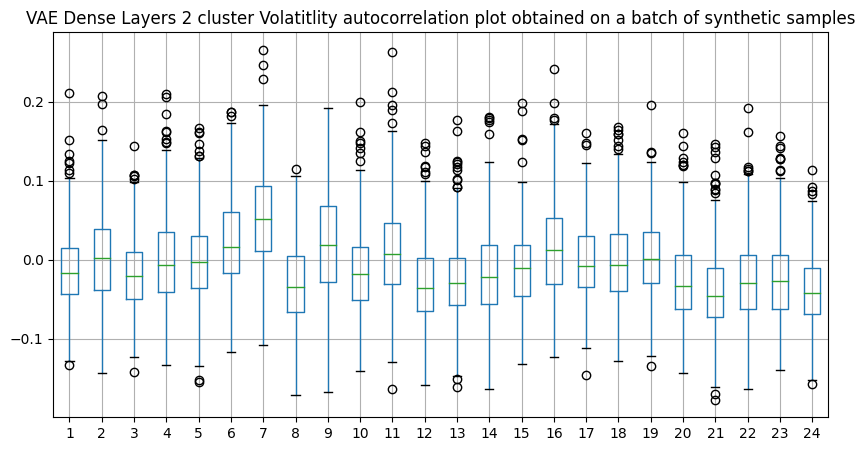

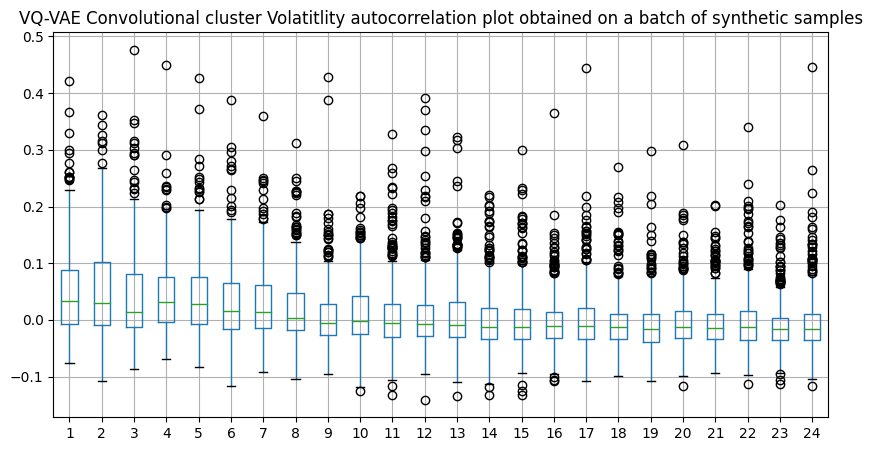

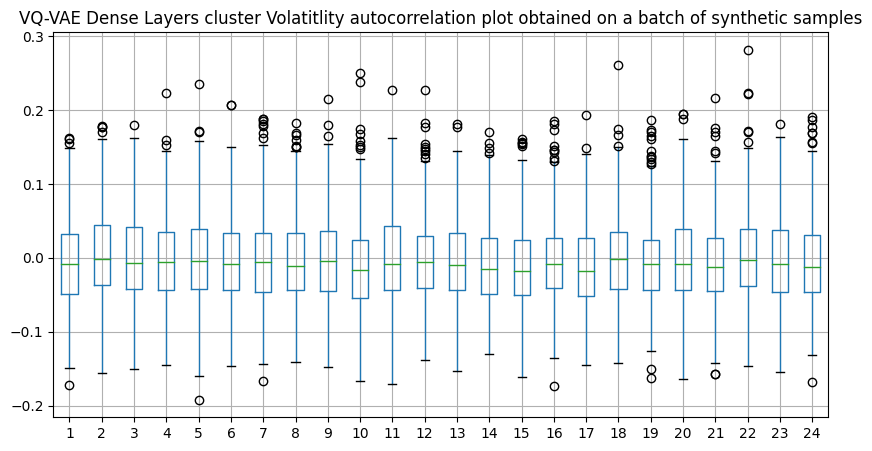

In [17]:
for k, v, in generated.items():
    title = k +' cluster Volatitlity autocorrelation plot obtained on a batch of synthetic samples'
    df = acf_batch(v, square=True)
    df.boxplot(figsize=(10, 5))
    plt.title(title)
    plt.show()

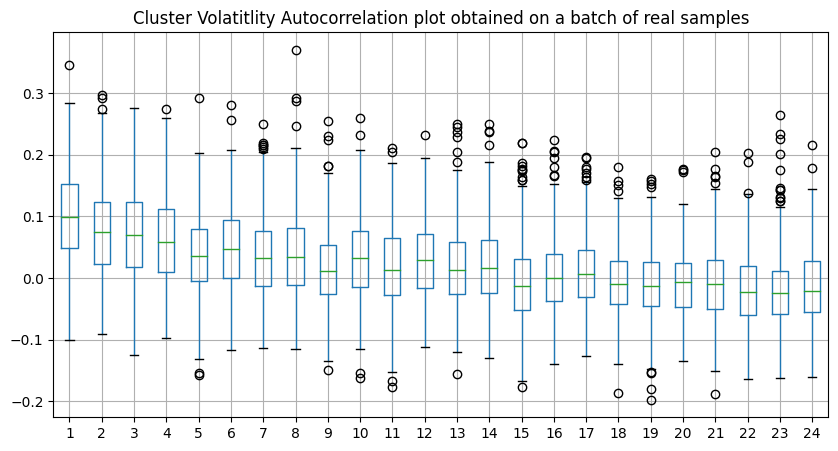

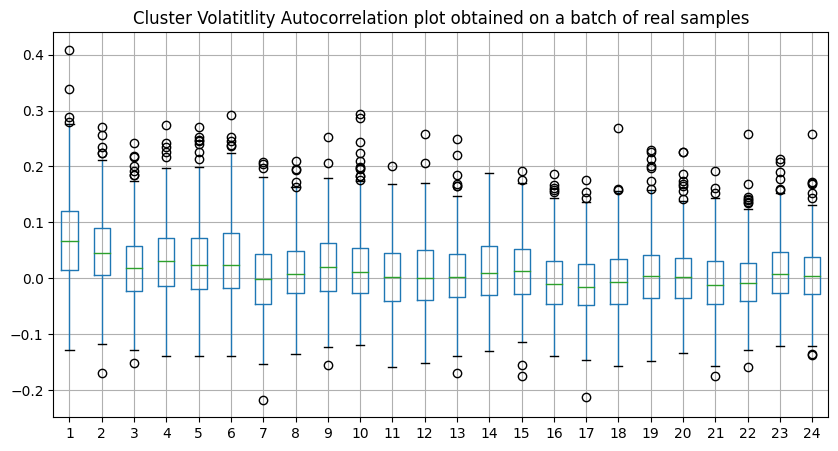

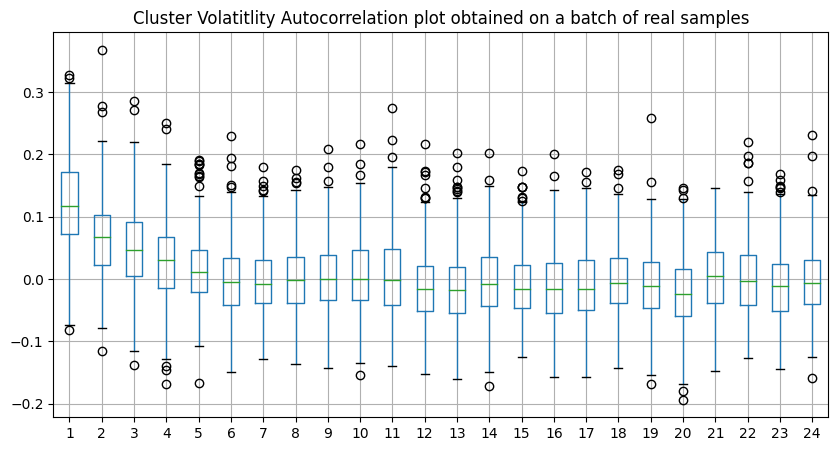

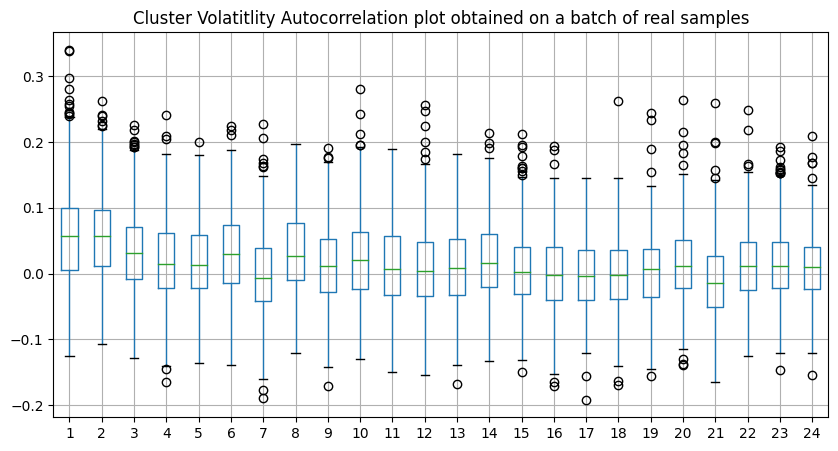

In [18]:
title = 'Cluster Volatitlity Autocorrelation plot obtained on a batch of real samples'
for batch in data_eval: 
    df = acf_batch(batch, abs=True)
    df.boxplot(figsize=(10, 5))
    plt.title(title)
    plt.show()

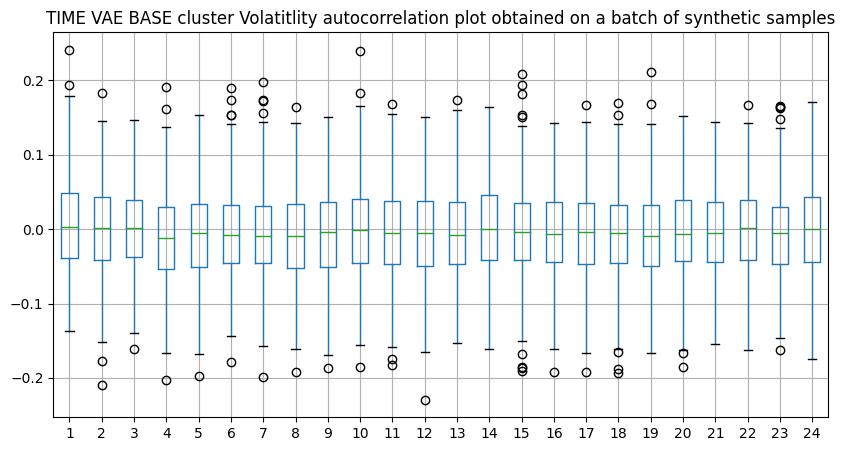

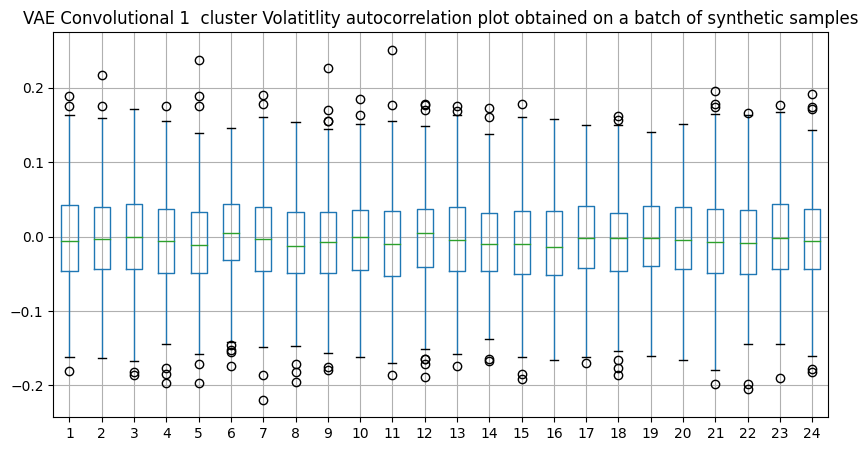

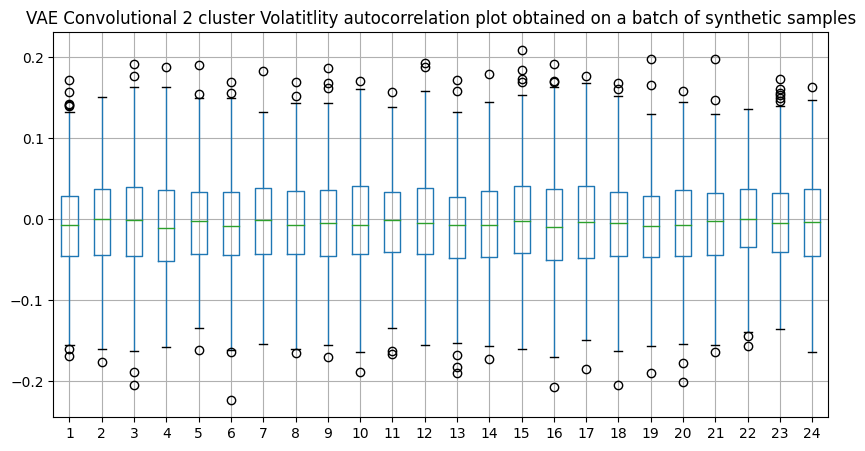

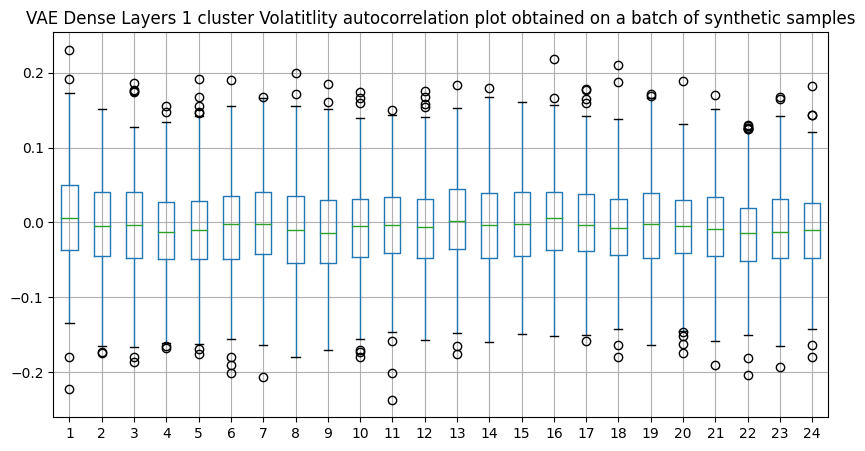

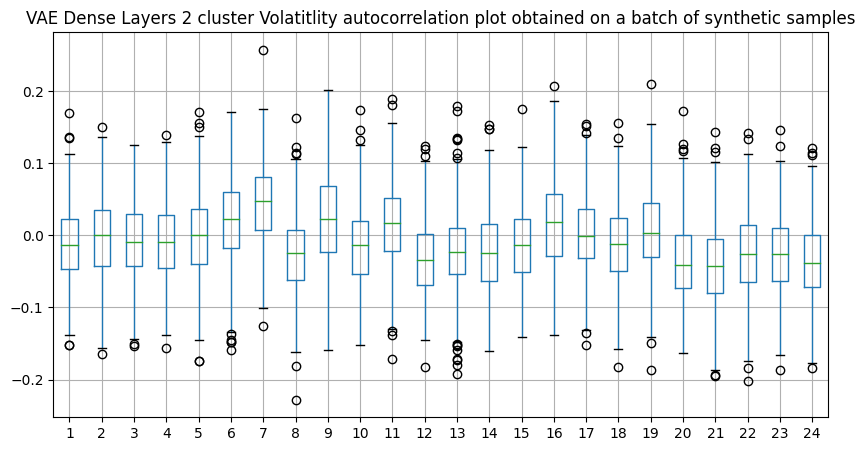

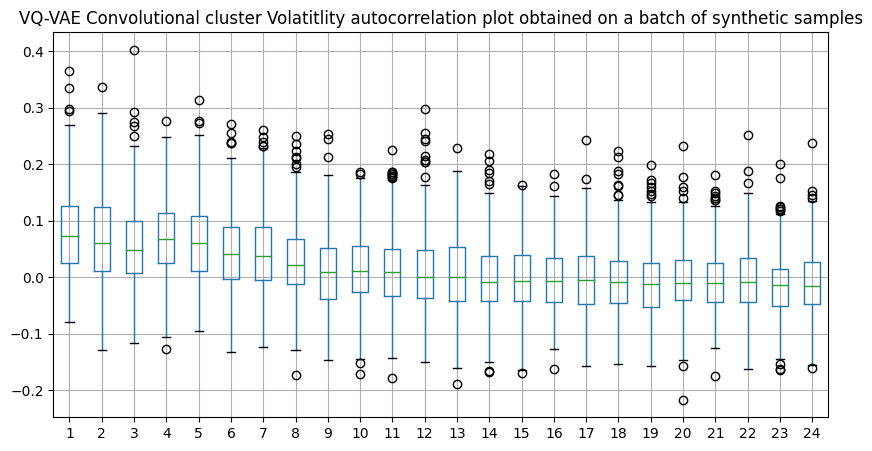

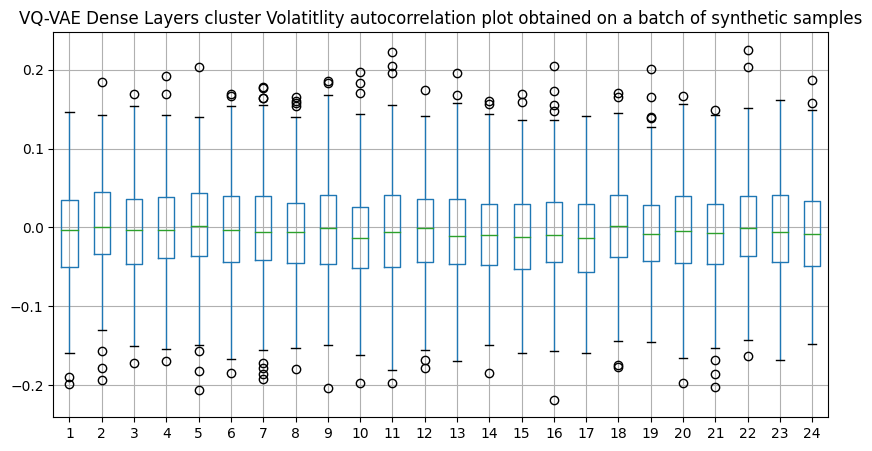

In [19]:
for k, v, in generated.items():
    title = k +' cluster Volatitlity autocorrelation plot obtained on a batch of synthetic samples'
    df = acf_batch(v, abs=True)
    df.boxplot(figsize=(10, 5))
    plt.title(title)
    plt.show()

# Heavy tail distribution

In [12]:
for i in range(4):
    real = pd.DataFrame(data_eval[i].flatten())
    print('Real Data Max: ', real.max())
    print('Real Data Min: ', real.min())

Real Data Max:  0    0.339428
dtype: float64
Real Data Min:  0   -0.336685
dtype: float64
Real Data Max:  0    0.481849
dtype: float64
Real Data Min:  0   -0.312365
dtype: float64
Real Data Max:  0    0.420617
dtype: float64
Real Data Min:  0   -0.285143
dtype: float64
Real Data Max:  0    0.481849
dtype: float64
Real Data Min:  0   -0.371311
dtype: float64


In [13]:
for model, synth_data in generated.items():
    print('Model: ', model)

    print('Synth Data Max: ', synth_data.max())
    print('Synth Data Min: ', synth_data.min())

Model:  TIME VAE BASE
Synth Data Max:  0.042968035
Synth Data Min:  -0.10307336
Model:  VAE CONV1 
Synth Data Max:  0.03808418216355101
Synth Data Min:  -0.0393675830478037
Model:  VAE CONV3
Synth Data Max:  0.14600960302876592
Synth Data Min:  -0.1258341500856946
Model:  VAE FD1
Synth Data Max:  0.10891162112889939
Synth Data Min:  -0.0885284264975152
Model:  VAE FD2
Synth Data Max:  0.03934465364458169
Synth Data Min:  -0.03523304116650405
Model:  VQ VAE CONV2
Synth Data Max:  0.16704141332380268
Synth Data Min:  -0.18485490519796333
Model:  VQ VAE FD1
Synth Data Max:  0.05547019786917105
Synth Data Min:  -0.039619342212138246


Model:  TIME VAE BASE


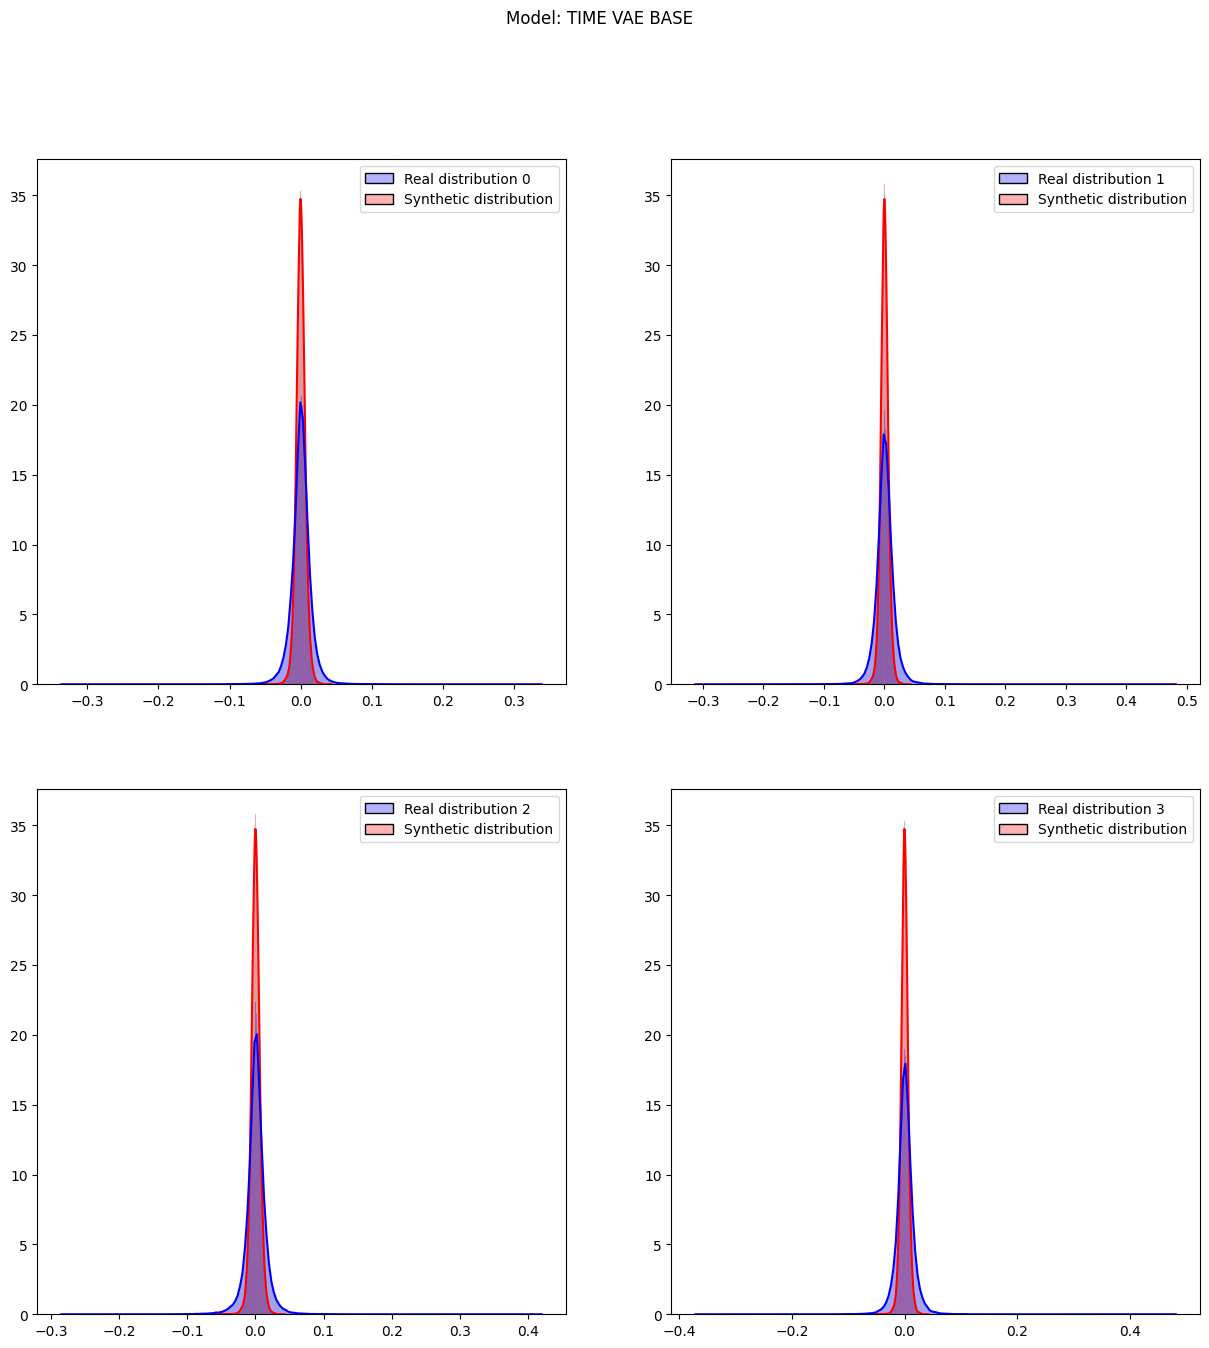

Model:  VAE Convolutional 1 


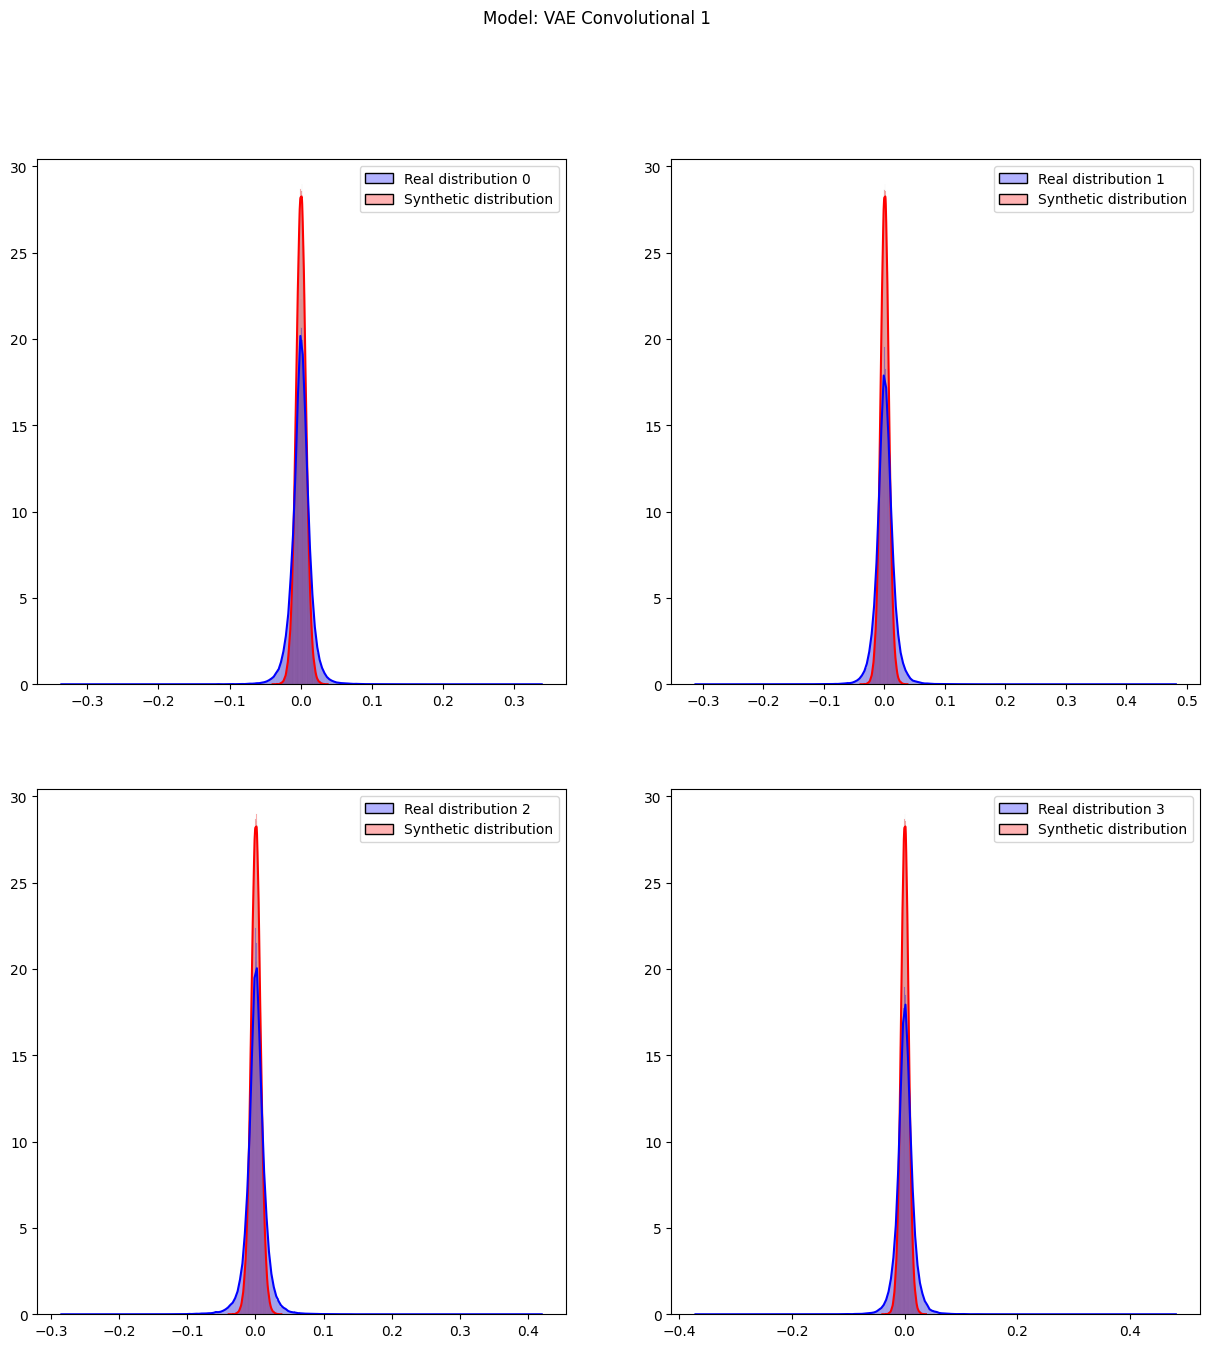

Model:  VAE Convolutional 2


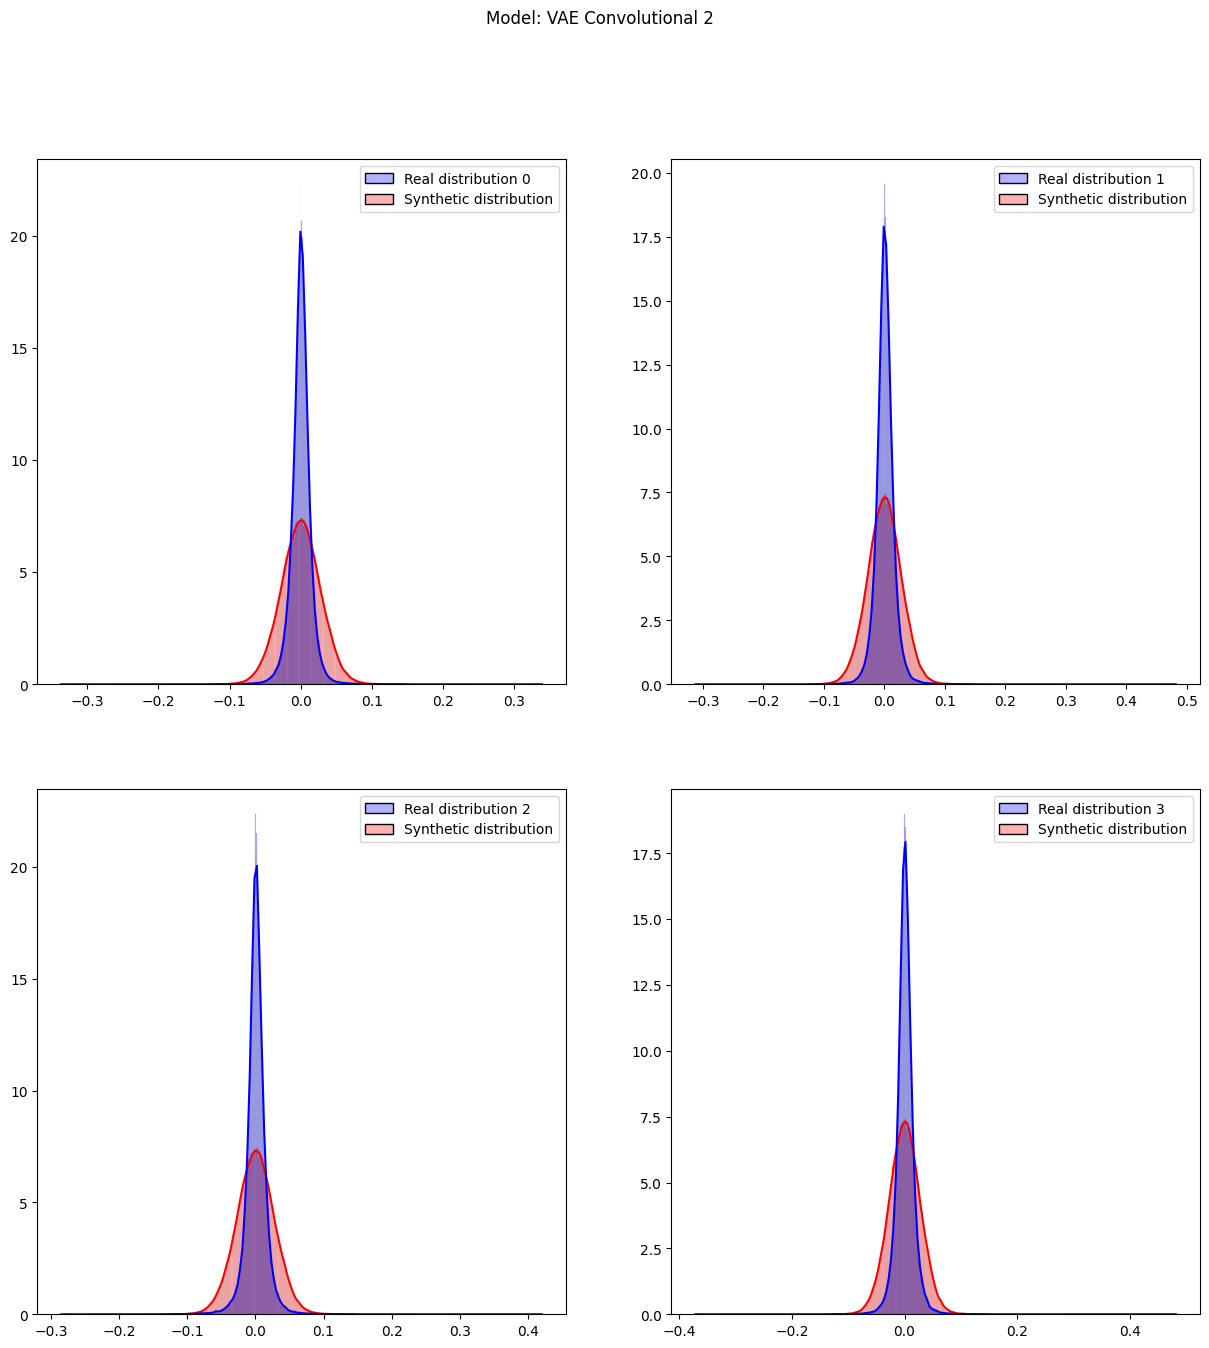

Model:  VAE Dense Layers 1


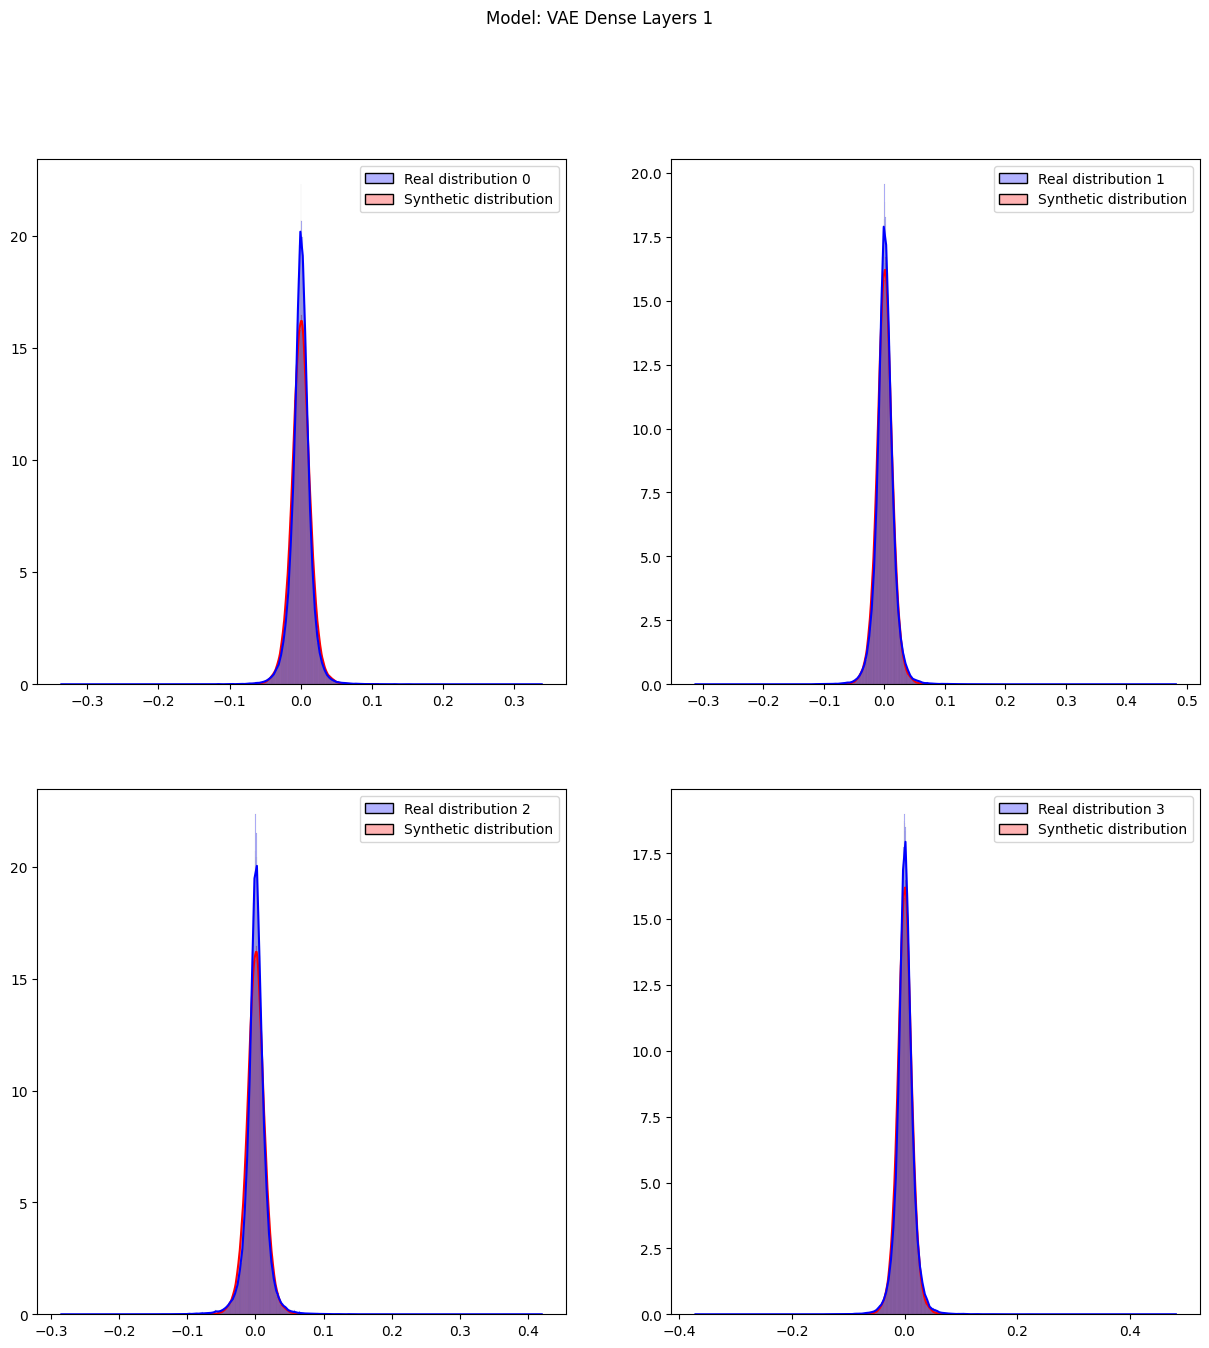

Model:  VAE Dense Layers 2


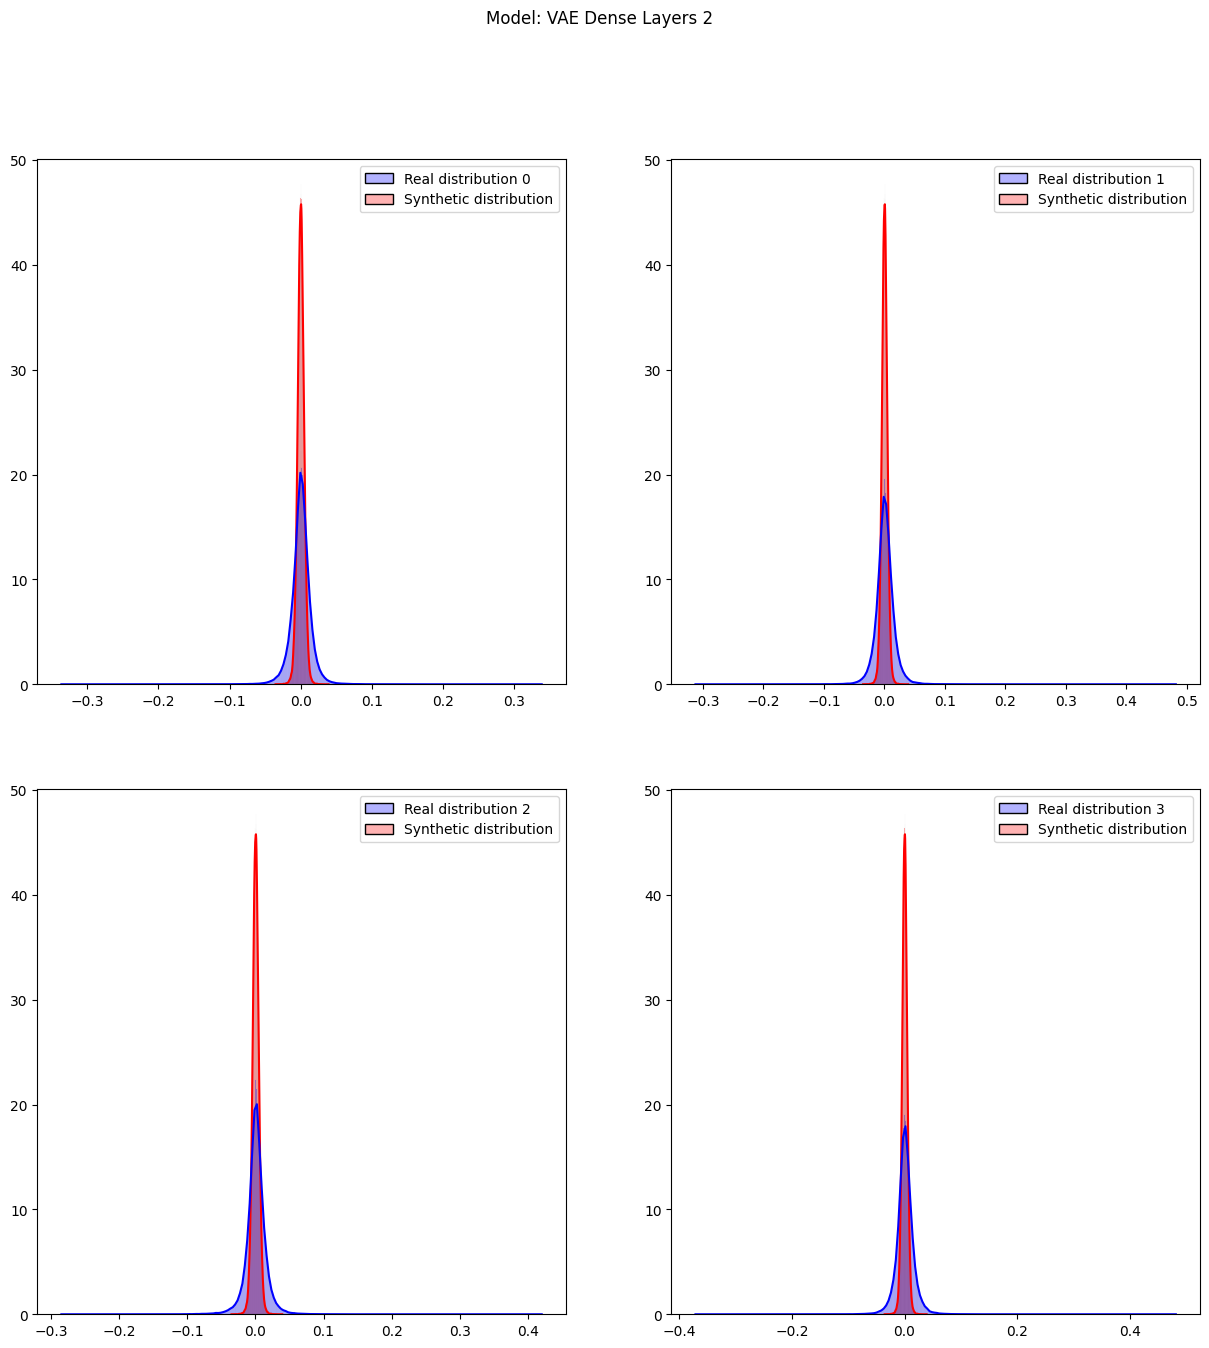

Model:  VQ-VAE Convolutional


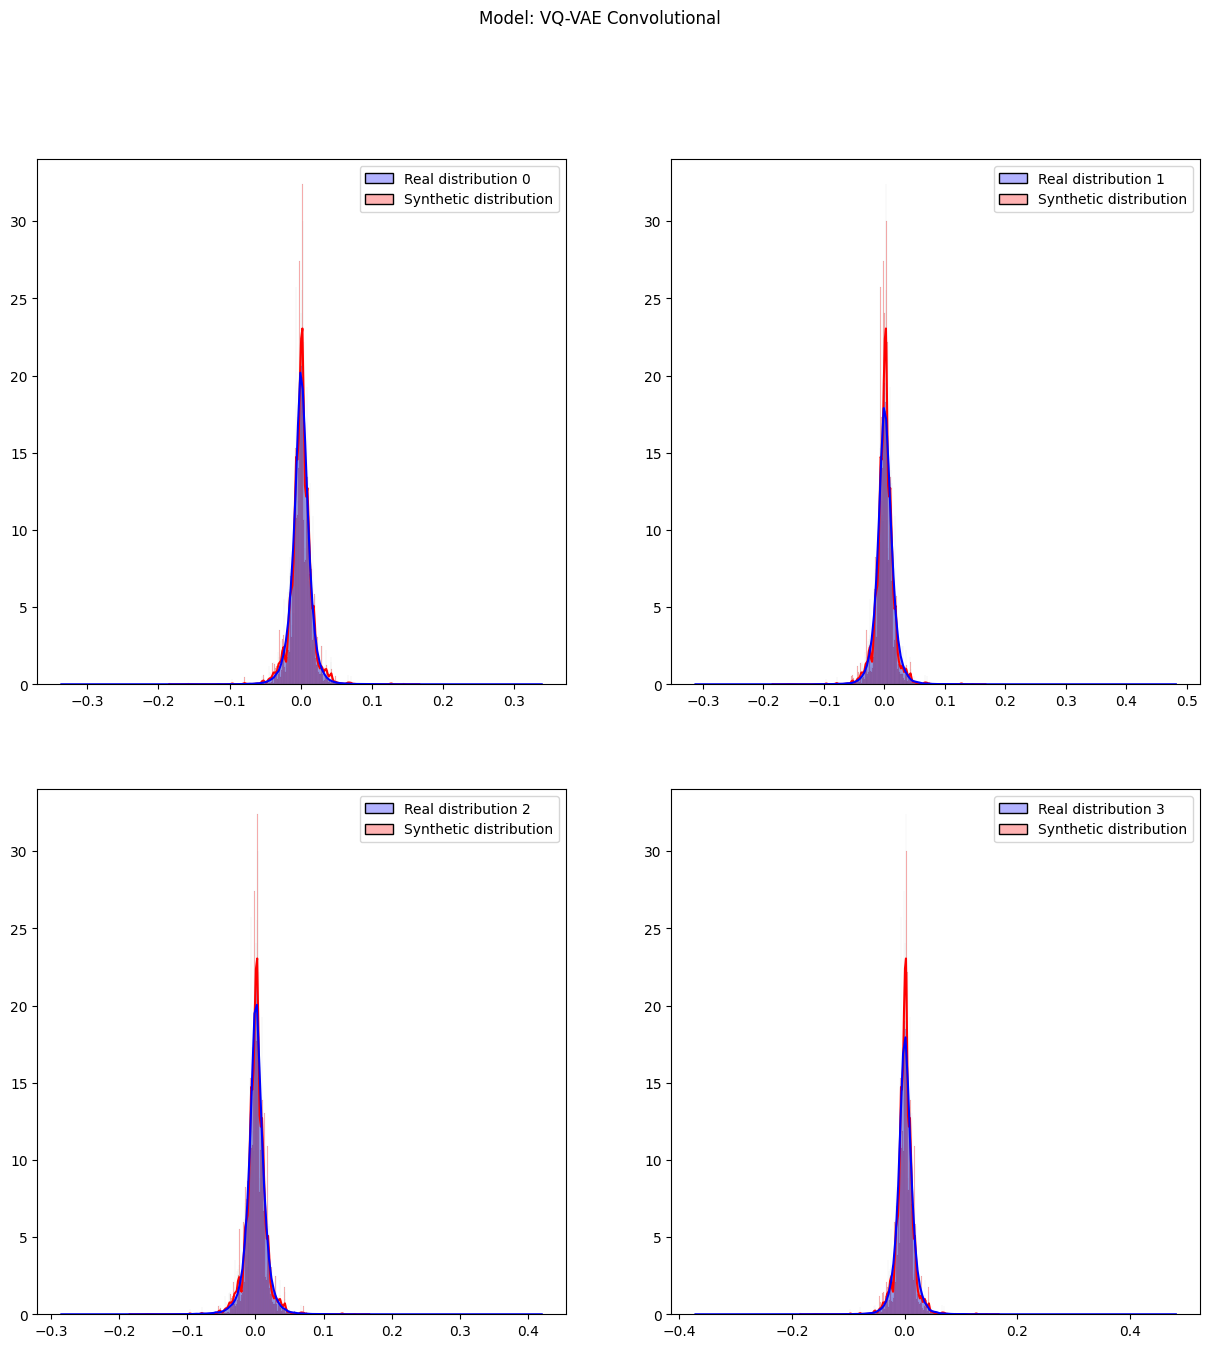

Model:  VQ-VAE Dense Layers


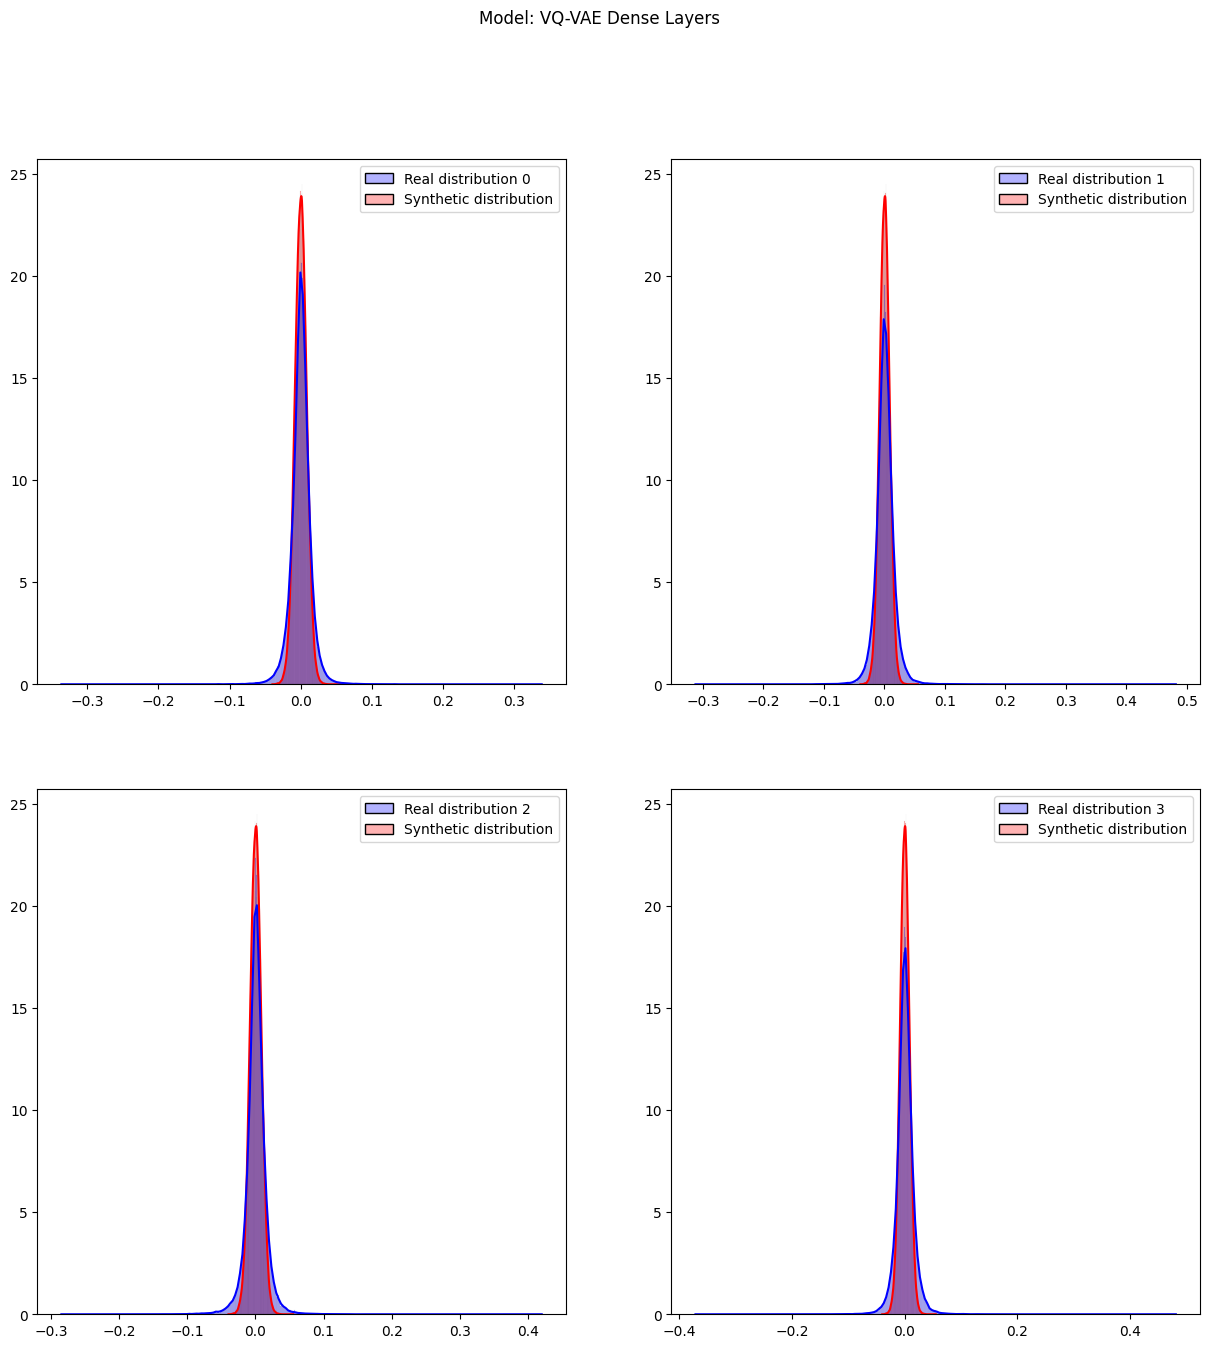

In [20]:
sns.set_palette(['blue', 'red'])
for model, synth_data in generated.items():
    print('Model: ', model)
    fig, axes = plt.subplots(2,2, figsize=(15,15)) 
    title = 'Model: ' + model
    fig.suptitle(title)
    for i in range(4):
        real = pd.DataFrame(data_eval[i].flatten())

        real['label'] = 'Real distribution'+ ' ' + str(i)
        real.columns = ['value', 'label']
        synth = pd.DataFrame(synth_data.flatten())
        synth['label'] = 'Synthetic distribution'
        synth.columns = ['value', 'label']
        df = pd.concat([real, synth])

        g =sns.histplot(df,
            bins='auto',
            kde=True,
            x = 'value',
            hue='label',
            stat="density",
            common_bins=False,
            # facet_kws={'legend_out': False}, 
            alpha=0.3,
            ax=axes[i//2, i%2]
                  )
        g.set(xlabel= None, ylabel= None )
        g.legend_.set_title(None)
        # legend = g._legend
        # legend.set_title(None)
        # handles, labels = axes[i//2, i%2].get_legend_handles_labels()
        # axes[i//2, i%2].legend(handles=handles[1:], labels=labels[1:])
    plt.show()
    
        

Model:  TIME VAE BASE
Model:  VAE Convolutional 1 
Model:  VAE Convolutional 2
Model:  VAE Dense Layers 1
Model:  VAE Dense Layers 2
Model:  VQ-VAE Convolutional
Model:  VQ-VAE Dense Layers


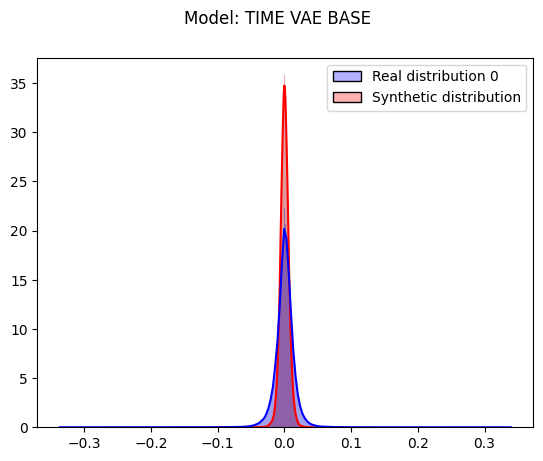

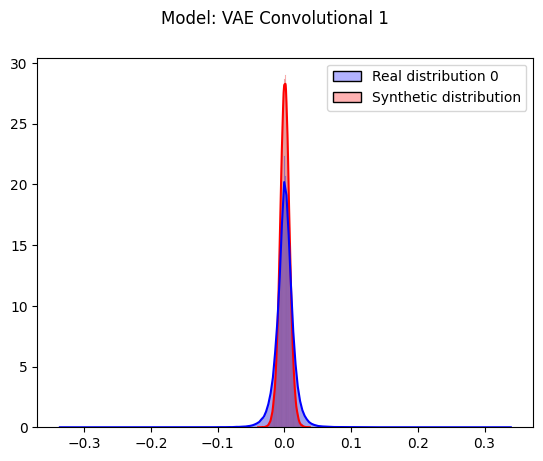

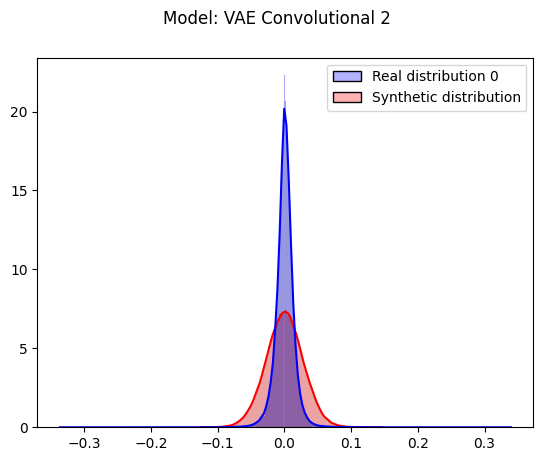

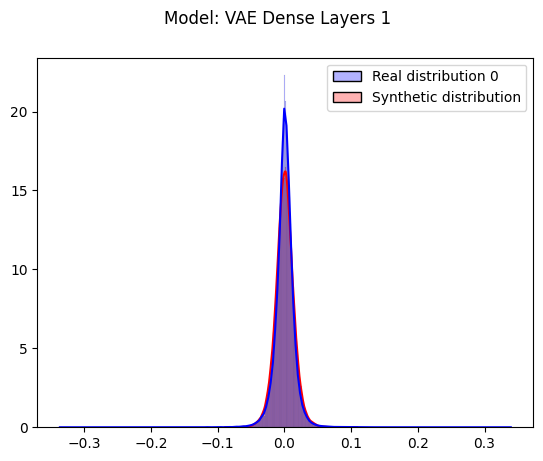

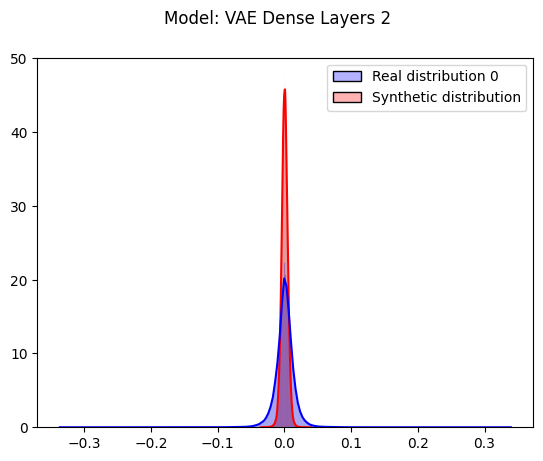

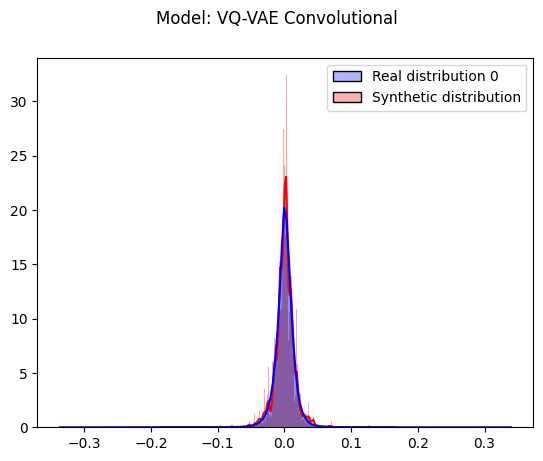

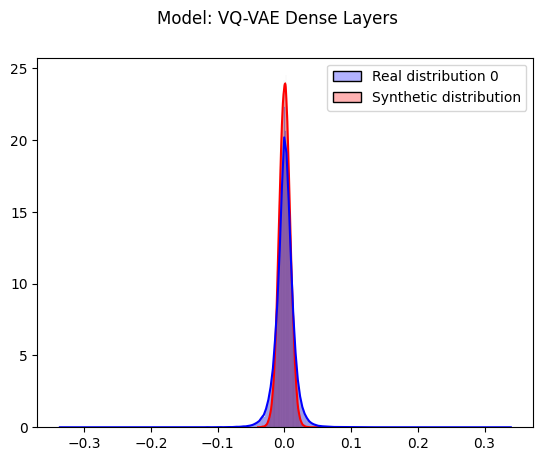

In [21]:
sns.set_palette(['blue', 'red'])
i =0 
for model, synth_data in generated.items():
    print('Model: ', model)
    fig, axes = plt.subplots( ) 
    title = 'Model: ' + model
    fig.suptitle(title)
    
    # for i in range(4):
    real = pd.DataFrame(data_eval[i].flatten())
    real['label'] = 'Real distribution'+ ' ' + str(i)
    real.columns = ['value', 'label']
    synth = pd.DataFrame(synth_data.flatten())
    synth['label'] = 'Synthetic distribution'
    synth.columns = ['value', 'label']
    df = pd.concat([real, synth])

    g =sns.histplot(df,
        bins='auto',
        kde=True,
        x = 'value',
        hue='label',
        stat="density",
        # facet_kws={'legend_out': False}, 
        alpha=0.3,
        common_bins=False,
        # ax=axes[i//2, i%2]
                )
    g.set(xlabel= None, ylabel= None )
    g.legend_.set_title(None)
    # legend = g._legend
    # legend.set_title(None)
    # handles, labels = axes[i//2, i%2].get_legend_handles_labels()
    # axes[i//2, i%2].legend(handles=handles[1:], labels=labels[1:])
plt.show()
    
        

# Cumulative sum

In [65]:
index = np.random.randint(0, train_batches, 3)
index = [10, 60, 46]
index


[10, 60, 46]

In [23]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

In [24]:
def plot_cumulativesum(batch, index, title):
    for i in index: 
        plt.plot(np.cumsum(batch[i]))
    plt.title(title)
    plt.show()


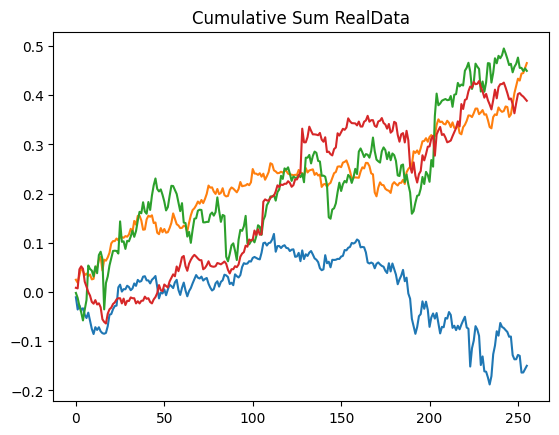

In [25]:
plot_cumulativesum(data_eval[0], index, title='Cumulative Sum RealData')

Model:  TIME VAE BASE


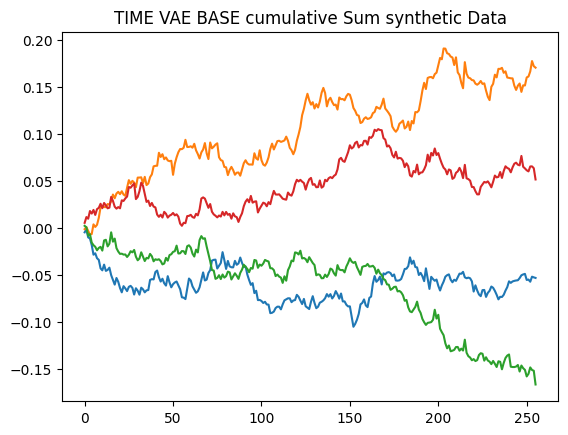

Model:  VAE Convolutional 1 


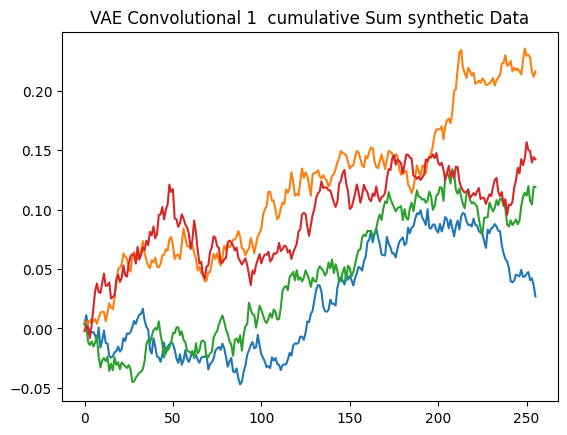

Model:  VAE Convolutional 2


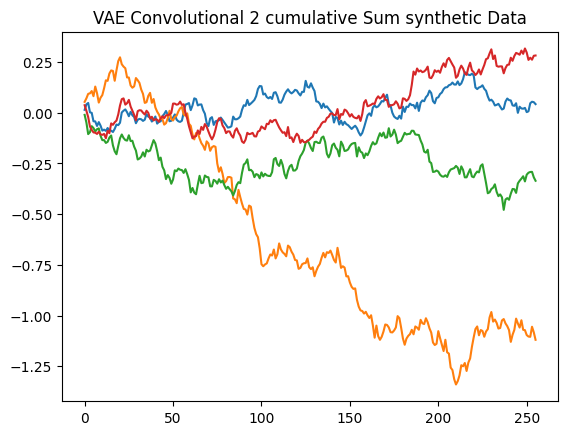

Model:  VAE Dense Layers 1


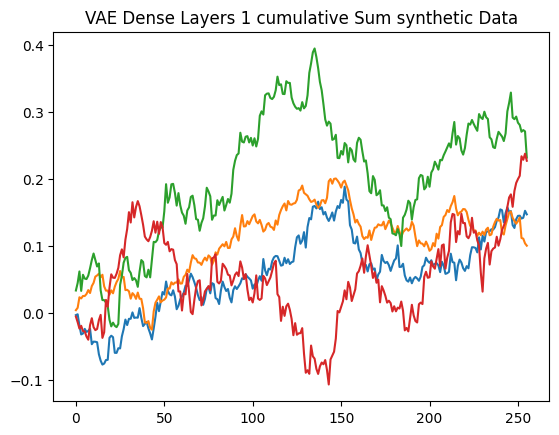

Model:  VAE Dense Layers 2


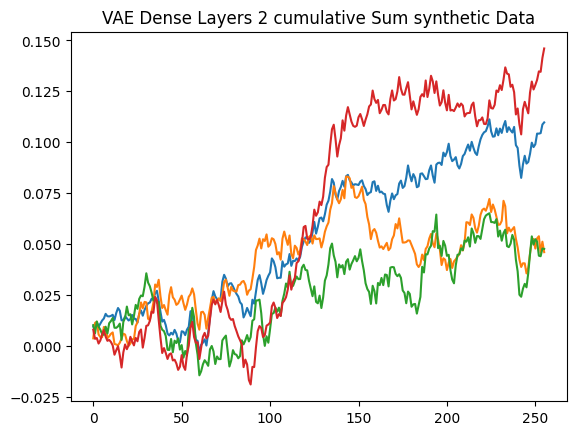

Model:  VQ-VAE Convolutional


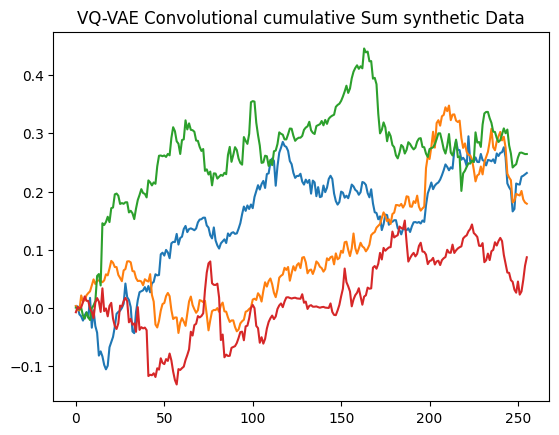

Model:  VQ-VAE Dense Layers


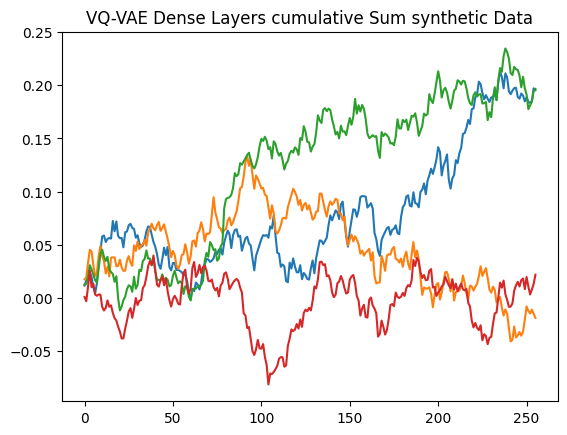

In [26]:
for model, synth in generated.items():
    print('Model: ', model)    
    title =  model + ' cumulative Sum synthetic Data'
    plot_cumulativesum(synth, index, title=title)
    

# Tren Ratios 

In [10]:
def plot_cumulativesum(batch, index, title):
    for i in index: 
        plt.plot(np.cumsum(batch[i]))
    plt.title(title)
    plt.show()

In [44]:
def plot_trendratio(batch, index, title, lw):
    for i in index: 
        s = np.cumsum(batch[i])
        trend = np.array([(s[i]/s[i-lw+1])-1 for i in range(lw-1, length)])
        n = np.array([np.abs((s[i]/s[i-1])-1) for i in range(lw-1, length)])
        n = np.cumsum(n)
        trend_ratio = trend/n
        plt.plot(trend_ratio)
        plt.title(title)
        plt.show()


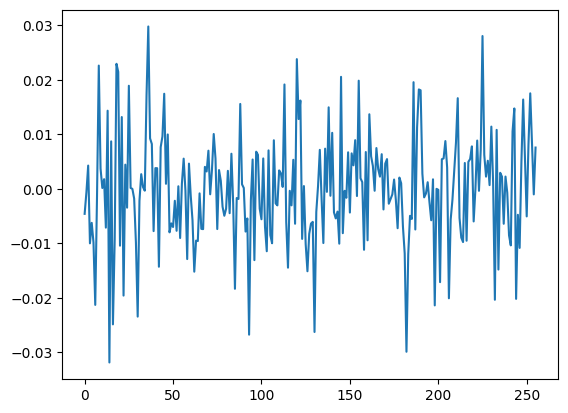

In [25]:
# Trend ratio
i = 0 
series = batch[i]
plt.plot(series)

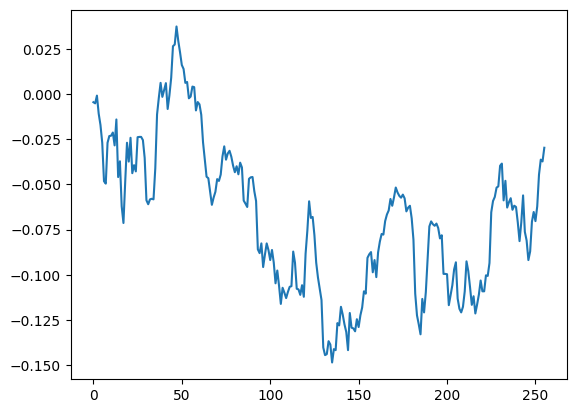

In [26]:
s = np.cumsum(series)
plt.plot(s)

(237,)


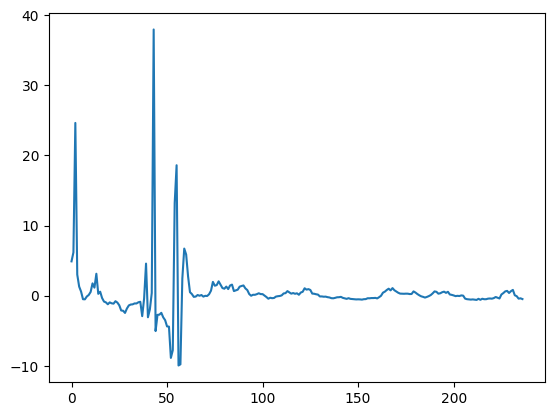

In [39]:
# Trend
lw = 20
trend = []
for i in range(lw-1, length):
    trend.append((s[i]/s[i-lw+1])-1)
trend = np.array(trend)
# trend = np.array([(s[i]/s[i-lw+1])-1 for i in range(lw-1, length)])
print(trend.shape)
plt.plot(trend)

In [45]:
lw-1 - (lw-1)

0

(237,)


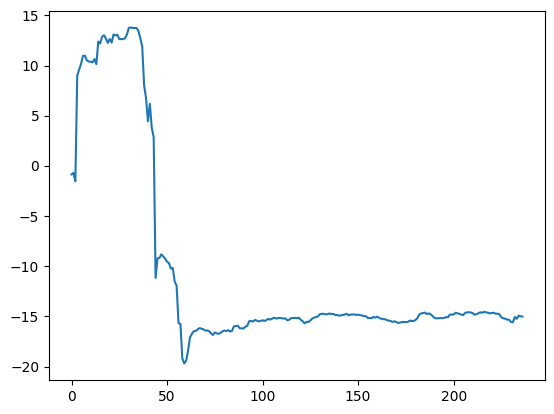

In [49]:
# Noise ???
n = np.array([(s[i]/s[i-1])-1 for i in range(0, length-lw+1)])
# n = np.abs(n)
n = np.cumsum(n)
print(n.shape)
plt.plot(n)

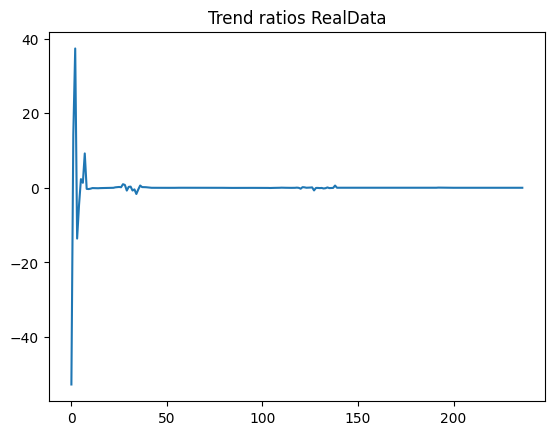

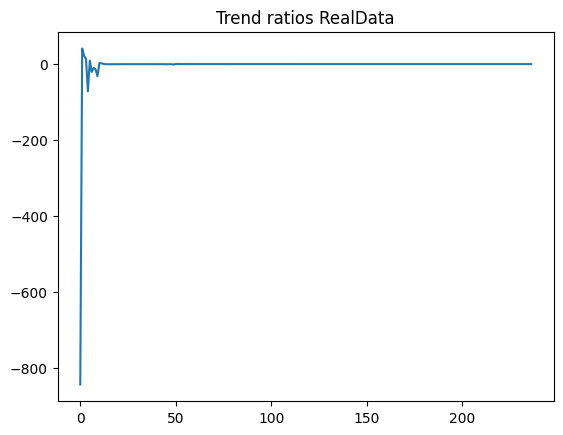

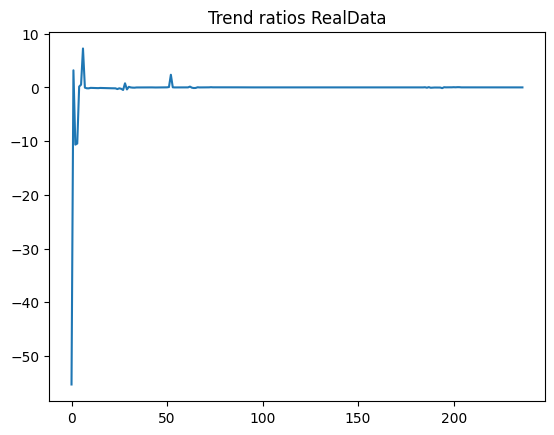

In [51]:
plot_trendratio(data_eval[0], index, title = 'Trend ratios RealData', lw=20)

Model:  VQ VAE CONV2


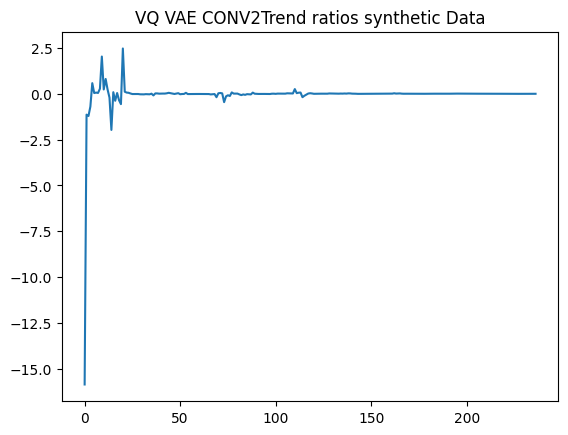

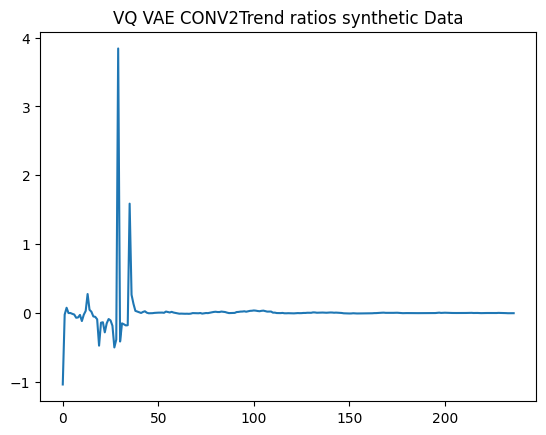

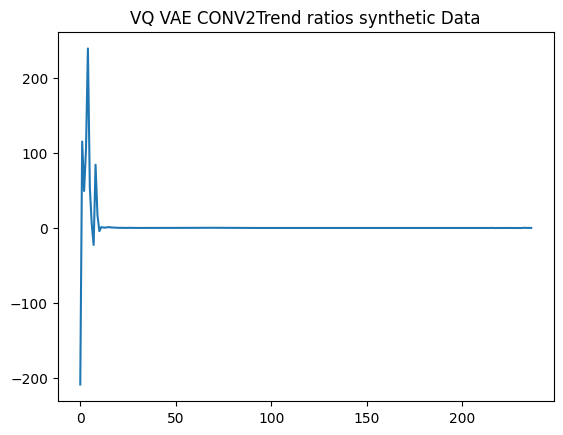

Model:  VAE CONV1 


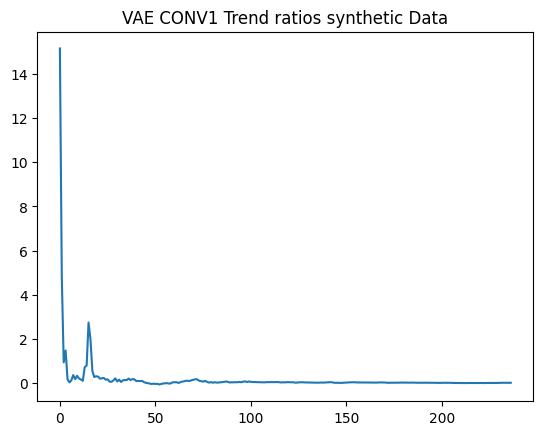

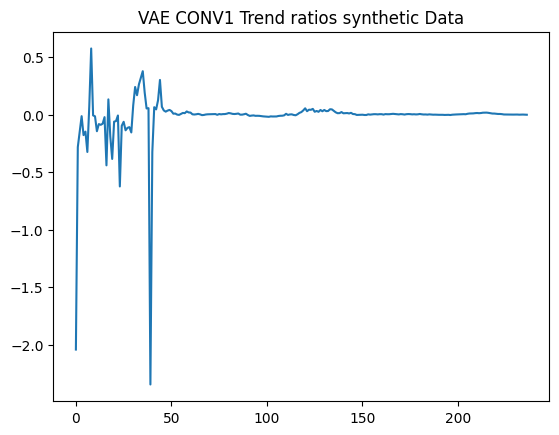

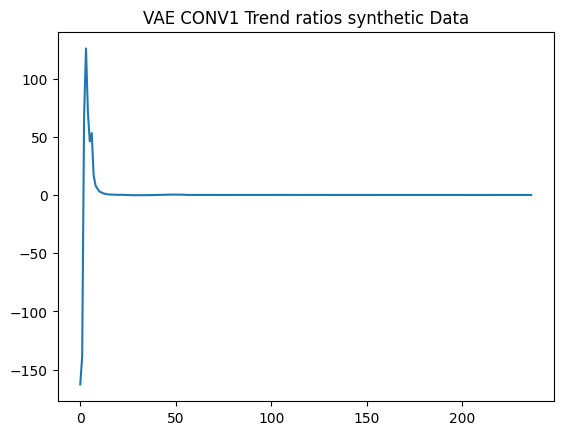

Model:  VAE CONV3


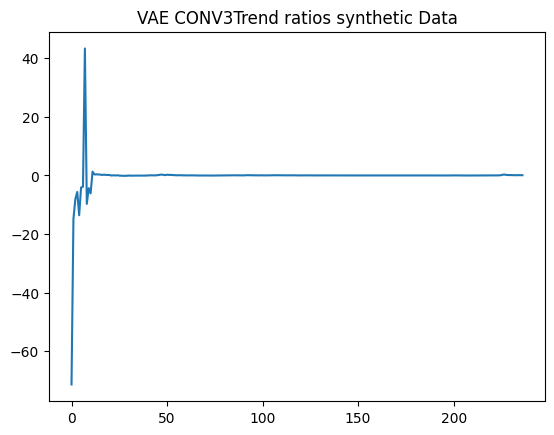

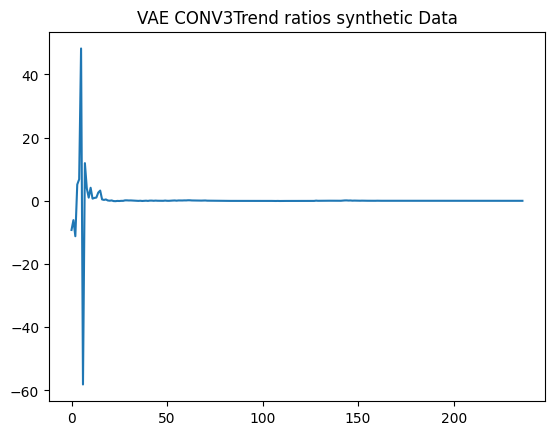

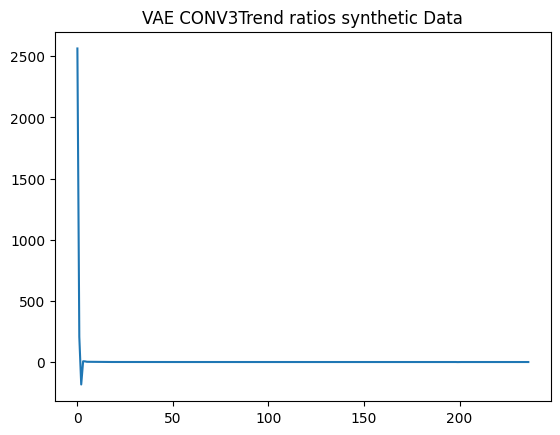

Model:  VAE FD1


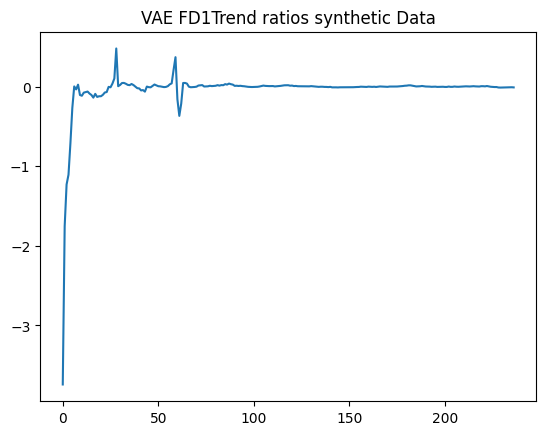

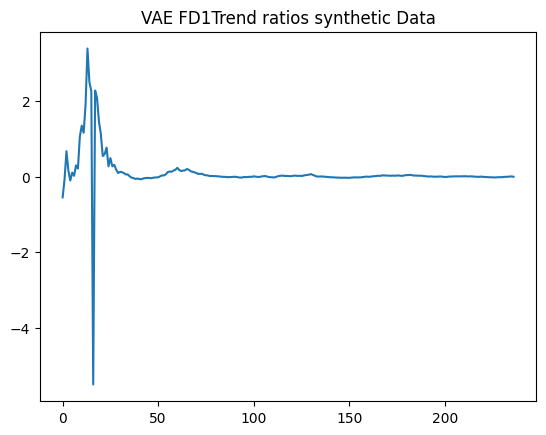

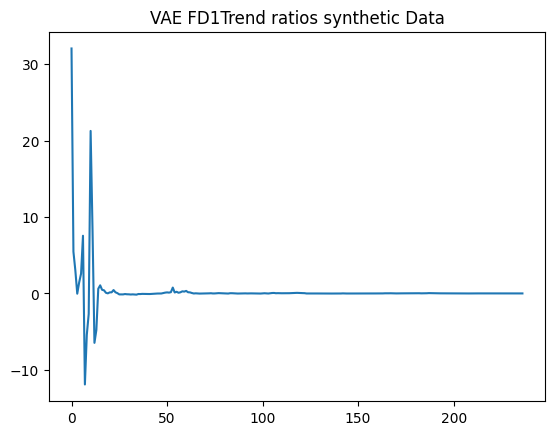

Model:  VAE FD2


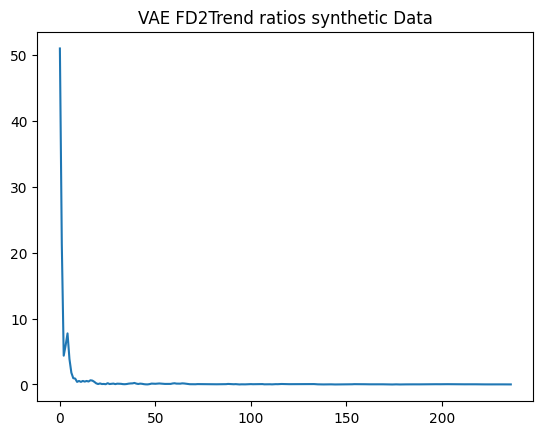

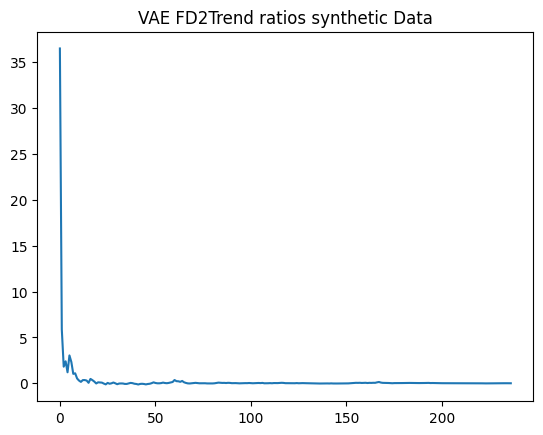

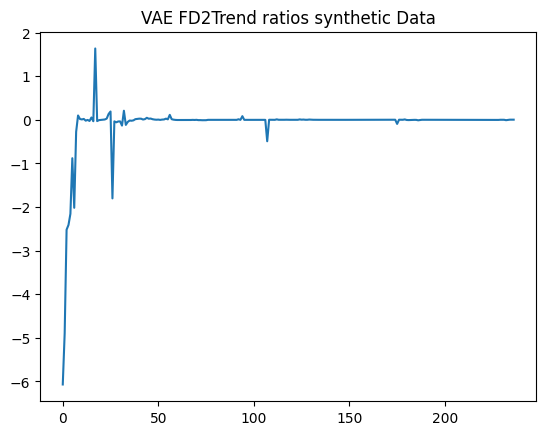

Model:  VQ VAE FD1


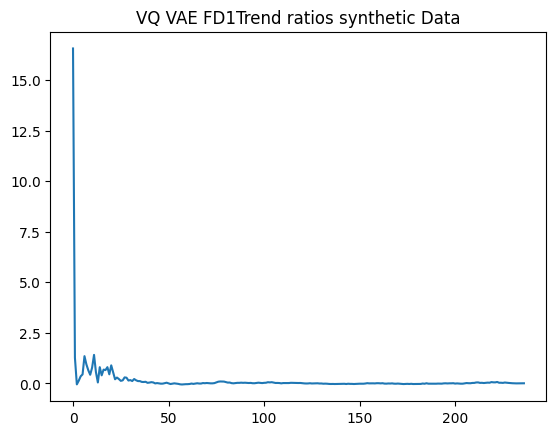

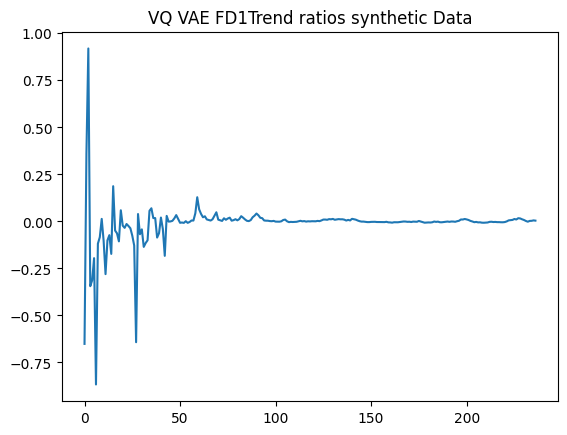

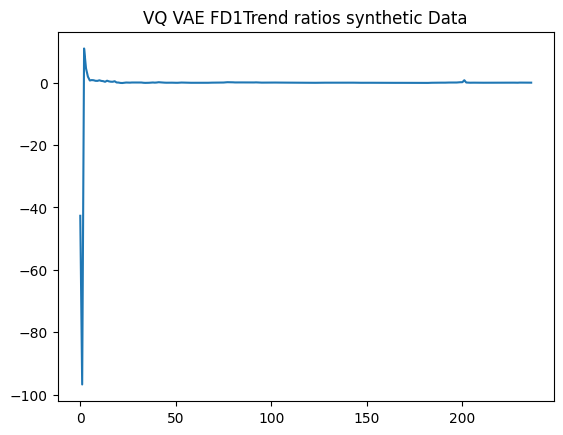

In [54]:
for model, synth in generated.items():
    print('Model: ', model)    
    title =  model + 'Trend ratios synthetic Data'
    plot_trendratio(synth, index, title = title, lw=20)